![title](Header__0009_1.png "Header")
___
# Chapter 1 - Data Munging Basics
## Segment 1 - Filtering and selecting data

In [7]:
import numpy as np
import pandas as pd

from pandas import Series, DataFrame

### Selecting and retrieving data

In [8]:
series_obj = Series(np.arange(8), index=['row 1', 'row 2','row 3','row 4','row 5', 'row 6', 'row 7', 'row 8'])
series_obj

row 1    0
row 2    1
row 3    2
row 4    3
row 5    4
row 6    5
row 7    6
row 8    7
dtype: int32

In [9]:
# ['label-index']
# ♔┈♔┈♔┈( WHAT THIS DOES ) ┈♔┈♔┈♔
# When you write square brackets with a label-index inside them, this tells Python to select and 
# retrieve all records with that label-index.
series_obj['row 7']

6

In [10]:
# [integer index] 
# ♔┈♔┈♔┈( WHAT THIS DOES )┈♔┈♔┈♔
# When you write square brackets with an integer index inside them, this tells Python to select and 
# retrieve all records with the specified integer index.
series_obj[[0,7]]

row 1    0
row 8    7
dtype: int32

In [22]:
np.random.seed(25)
DF_obj = DataFrame(np.random.rand(36).reshape((6,6)), 
                   index=['row 1', 'row 2', 'row 3', 'row 4', 'row 5', 'row 6'],
                   columns=['column 1', 'column 2', 'column 3', 'column 4', 'column 5', 'column 6'])
DF_obj

column 1  column 2  column 3  column 4  column 5  column 6
row 1  0.870124  0.582277  0.278839  0.185911  0.411100  0.117376
row 2  0.684969  0.437611  0.556229  0.367080  0.402366  0.113041
row 3  0.447031  0.585445  0.161985  0.520719  0.326051  0.699186
row 4  0.366395  0.836375  0.481343  0.516502  0.383048  0.997541
row 5  0.514244  0.559053  0.034450  0.719930  0.421004  0.436935
row 6  0.281701  0.900274  0.669612  0.456069  0.289804  0.525819

In [13]:
# object_name.ix[[row indexes], [column indexes]]
# ♔┈♔┈♔┈( WHAT THIS DOES )┈♔┈♔┈♔
# When you call the .ix[] special indexer, and pass in a set of row and colum indexes, this tells 
# Python to select and retrieve only those specific rows and columns.
DF_obj.ix[['row 2', 'row 5'], ['column 5', 'column 2']]

column 5  column 2
row 2  0.402366  0.437611
row 5  0.421004  0.559053

### Data slicing

In [14]:
# ['starting label-index':'ending label-index'] 
# ♔┈♔┈♔┈( WHAT THIS DOES )┈♔┈♔┈♔
# Data slicing allows you to select and retrieve all records from the starting label-index, to the 
# ending label-index, and every record in between.
series_obj['row 3':'row 7']

row 3    2
row 4    3
row 5    4
row 6    5
row 7    6
dtype: int32

### Comparing with scalars

In [25]:

# object_name < scalar value
# ♔┈♔┈♔┈( WHAT THIS DOES )┈♔┈♔┈♔
# You can use comparison operators (like greater than or less than) to return True / False values for 
# all records, to indicate how each element compares to a scalar value. 
DF_obj < .2

column 1 column 2 column 3 column 4 column 5 column 6
row 1    False    False    False     True    False     True
row 2    False    False    False    False    False     True
row 3    False    False     True    False    False    False
row 4    False    False    False    False    False    False
row 5    False    False     True    False    False    False
row 6    False    False    False    False    False    False

### Filtering with scalars

In [26]:
# object_name[object_name > scalar value] 
# ♔┈♔┈♔┈( WHAT THIS DOES )┈♔┈♔┈♔
# You can also use comparison operators and scalar values for indexing, to return only the records 
# that satisfy the comparison expression you write.
series_obj[series_obj > 6]

row 8    7
dtype: int32

### Setting values with scalars

In [27]:
# ['label-index', 'label-index', 'label-index'] = scalar value
# ♔┈♔┈♔┈( WHAT THIS DOES )┈♔┈♔┈♔
# Setting is where you select all records associated with the specified label-indexes and set those 
# values equal to a scalar.
series_obj['row 1', 'row 5', 'row 8'] = 8

In [28]:
series_obj

row 1    8
row 2    1
row 3    2
row 4    3
row 5    8
row 6    5
row 7    6
row 8    8
dtype: int32

![title](Header__0009_1.png "Header")
___
# Chapter 1 - Data Munging Basics
## Segment 2 - Treating missing values

In [1]:
import numpy as np
import pandas as pd 

from pandas import Series, DataFrame

### Figuring out what data is missing

In [2]:
missing = np.nan

series_obj = Series(['row 1', 'row 2', missing, 'row 4','row 5', 'row 6', missing, 'row 8'])
series_obj

0    row 1
1    row 2
2      NaN
3    row 4
4    row 5
5    row 6
6      NaN
7    row 8
dtype: object

In [12]:
# object_name.isnull()
# ♔┈♔┈♔┈( WHAT THIS DOES )┈♔┈♔┈♔
# The .isnull() method returns a Boolean value that describes (True or False) whether an element in a 
# Pandas object is a null value.
series_obj.isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
dtype: bool

### Filling in for missing values

In [2]:
np.random.seed(25)
DF_obj = DataFrame(np.random.randn(36).reshape(6,6))
DF_obj

0         1         2         3         4         5
0  0.228273  1.026890 -0.839585 -0.591182 -0.956888 -0.222326
1 -0.619915  1.837905 -2.053231  0.868583 -0.920734 -0.232312
2  2.152957 -1.334661  0.076380 -1.246089  1.202272 -1.049942
3  1.056610 -0.419678  2.294842 -2.594487  2.822756  0.680889
4 -1.577693 -1.976254  0.533340 -0.290870 -0.513520  1.982626
5  0.226001 -1.839905  1.607671  0.388292  0.399732  0.405477

In [3]:
missing = np.nan
DF_obj.ix[3:5, 0] = missing
DF_obj.ix[1:4, 5] = missing
DF_obj

NameError: name 'missing' is not defined

In [15]:
# object_name.fillna(numeric value)
# ♔┈♔┈♔┈( WHAT THIS DOES )┈♔┈♔┈♔
# The .fillna method() finds each missing value from within a Pandas object and fills it with the 
# numeric value that you've passed in.
filled_DF = DF_obj.fillna(0)
filled_DF

0         1         2         3         4         5
0  0.228273  1.026890 -0.839585 -0.591182 -0.956888 -0.222326
1 -0.619915  1.837905 -2.053231  0.868583 -0.920734  0.000000
2  2.152957 -1.334661  0.076380 -1.246089  1.202272  0.000000
3  0.000000 -0.419678  2.294842 -2.594487  2.822756  0.000000
4  0.000000 -1.976254  0.533340 -0.290870 -0.513520  0.000000
5  0.000000 -1.839905  1.607671  0.388292  0.399732  0.405477

In [17]:
# object_name.fillna(dict)
# ♔┈♔┈♔┈( WHAT THIS DOES )┈♔┈♔┈♔
# You can pass a dictionary into the .fillna() method. The method will then fill in missing values 
# from each column Series (as designated by the dictionary key) with its own unique value 
# (as specified in the corresponding dictionary value).
filled_DF = DF_obj.fillna({0: 0.1, 5: 1.25})
filled_DF

0         1         2         3         4         5
0  0.228273  1.026890 -0.839585 -0.591182 -0.956888 -0.222326
1 -0.619915  1.837905 -2.053231  0.868583 -0.920734  1.250000
2  2.152957 -1.334661  0.076380 -1.246089  1.202272  1.250000
3  0.100000 -0.419678  2.294842 -2.594487  2.822756  1.250000
4  0.100000 -1.976254  0.533340 -0.290870 -0.513520  1.250000
5  0.100000 -1.839905  1.607671  0.388292  0.399732  0.405477

In [18]:
# ♔┈♔┈♔┈( WHAT THIS DOES )┈♔┈♔┈♔
# You can also pass in the method='ffill' arguement, and the .fillna() method will fill-forward any 
# missing values with values from the last non-null element in the column Series.
fill_DF = DF_obj.fillna(method='ffill')
fill_DF

0         1         2         3         4         5
0  0.228273  1.026890 -0.839585 -0.591182 -0.956888 -0.222326
1 -0.619915  1.837905 -2.053231  0.868583 -0.920734 -0.222326
2  2.152957 -1.334661  0.076380 -1.246089  1.202272 -0.222326
3  2.152957 -0.419678  2.294842 -2.594487  2.822756 -0.222326
4  2.152957 -1.976254  0.533340 -0.290870 -0.513520 -0.222326
5  2.152957 -1.839905  1.607671  0.388292  0.399732  0.405477

### Counting missing values

In [21]:
np.random.seed(25)
DF_obj = DataFrame(np.random.randn(36).reshape(6,6))
DF_obj.ix[3:5, 0] = missing
DF_obj.ix[1:4, 5] = missing
DF_obj

0         1         2         3         4         5
0  0.228273  1.026890 -0.839585 -0.591182 -0.956888 -0.222326
1 -0.619915  1.837905 -2.053231  0.868583 -0.920734       NaN
2  2.152957 -1.334661  0.076380 -1.246089  1.202272       NaN
3       NaN -0.419678  2.294842 -2.594487  2.822756       NaN
4       NaN -1.976254  0.533340 -0.290870 -0.513520       NaN
5       NaN -1.839905  1.607671  0.388292  0.399732  0.405477

In [22]:
# object_name.isnull().sum()
# ♔┈♔┈♔┈( WHAT THIS DOES )┈♔┈♔┈♔
# To generate a count of how many missing values a DataFrame has per column, just call the .isnull() 
# method off of the object, and then call the .sum() method off of the matrix of Boolean values it 
# returns.
DF_obj.isnull().sum()

0    3
1    0
2    0
3    0
4    0
5    4
dtype: int64

### Filtering out missing values

In [30]:
# object_name.dropna()
# ♔┈♔┈♔┈( WHAT THIS DOES )┈♔┈♔┈♔
# To identify and drop all rows from a DataFrame that contain ANY missing values, simply call the 
# .dropna() method off of the DataFrame object. NOTE: If you wanted to drop columns that contain 
# any missing values, you'd just pass in the axis=1 argument to select and search the DataFrame 
# by columns, instead of by row.
DF_no_NaN = DF_obj.dropna(axis=1)
DF_no_NaN

1         2         3         4
0  1.026890 -0.839585 -0.591182 -0.956888
1  1.837905 -2.053231  0.868583 -0.920734
2 -1.334661  0.076380 -1.246089  1.202272
3 -0.419678  2.294842 -2.594487  2.822756
4 -1.976254  0.533340 -0.290870 -0.513520
5 -1.839905  1.607671  0.388292  0.399732

In [31]:
# object_name.dropna(how='all')
# ♔┈♔┈♔┈( WHAT THIS DOES )┈♔┈♔┈♔
# To identify and drop only the rows from a DataFrame that contain ALL missing values, simply 
# call the .dropna() method off of the DataFrame object, and pass in the how='all' argument.
DF_obj.dropna(how='all')

0         1         2         3         4         5
0  0.228273  1.026890 -0.839585 -0.591182 -0.956888 -0.222326
1 -0.619915  1.837905 -2.053231  0.868583 -0.920734       NaN
2  2.152957 -1.334661  0.076380 -1.246089  1.202272       NaN
3       NaN -0.419678  2.294842 -2.594487  2.822756       NaN
4       NaN -1.976254  0.533340 -0.290870 -0.513520       NaN
5       NaN -1.839905  1.607671  0.388292  0.399732  0.405477

![title](Header__0009_1.png "Header")
___
# Chapter 1 - Data Munging Basics
## Segment 3 - Removing duplicates

In [4]:
import numpy as np
import pandas as pd

from pandas import Series, DataFrame

### Removing duplicates

In [6]:
DF_obj = DataFrame({'column 1': [1, 1, 2, 2, 3, 3, 3],
                  'column 2': ['a', 'a', 'b', 'b', 'c', 'c', 'c'],
                  'column 3': ['A', 'A', 'B', 'B', 'C', 'C', 'C']})
DF_obj

column 1 column 2 column 3
0         1        a        A
1         1        a        A
2         2        b        B
3         2        b        B
4         3        c        C
5         3        c        C
6         3        c        C

In [7]:
# object_name.duplicated()
# ♔┈♔┈♔┈( WHAT THIS DOES )┈♔┈♔┈♔
# The .duplicated() method searches each row in the DataFrame, and returns a True or False value to 
#indicate whether it is a duplicate of another row found earlier in the DataFrame.
DF_obj.duplicated()

0    False
1     True
2    False
3     True
4    False
5     True
6     True
dtype: bool

In [8]:
# object_name.drop_duplicates()
# ♔┈♔┈♔┈( WHAT THIS DOES )┈♔┈♔┈♔
# To drop all duplicate rows, just call the drop_duplicates() method off of the DataFrame.
DF_obj.drop_duplicates()

column 1 column 2 column 3
0         1        a        A
2         2        b        B
4         3        c        C

In [10]:
DF_obj = DataFrame({'column 1': [1, 1, 2, 2, 3, 3, 3],
                  'column 2': ['a', 'a', 'b', 'b', 'c', 'c', 'c'],
                  'column 3': ['A', 'A', 'B', 'B', 'C', 'D', 'C']})
DF_obj

column 1 column 2 column 3
0         1        a        A
1         1        a        A
2         2        b        B
3         2        b        B
4         3        c        C
5         3        c        D
6         3        c        C

In [11]:
# object_name.drop_duplicates(['column_name'])
# ♔┈♔┈♔┈( WHAT THIS DOES )┈♔┈♔┈♔
# To drop the rows that have duplicates in only one column Series, just call the drop_duplicates() 
# method off of the DataFrame, and pass in the label-index of the column you want the de-duplication 
# to be based on. This method will drops all rows that have duplicates in the column you specify.
DF_obj.drop_duplicates(['column 3'])

column 1 column 2 column 3
0         1        a        A
2         2        b        B
4         3        c        C
5         3        c        D

![title](Header__0009_1.png "Header")
___
# Chapter 1- Data Munging Basics
## Segment 4 - Concatenating and transforming data

In [6]:
import numpy as np
import pandas as pd

from pandas import Series, DataFrame

In [7]:
DF_obj = pd.DataFrame(np.arange(36).reshape(6,6))
DF_obj

0   1   2   3   4   5
0   0   1   2   3   4   5
1   6   7   8   9  10  11
2  12  13  14  15  16  17
3  18  19  20  21  22  23
4  24  25  26  27  28  29
5  30  31  32  33  34  35

In [8]:
DF_obj_2 = pd.DataFrame(np.arange(15).reshape(5,3))
DF_obj_2

0   1   2
0   0   1   2
1   3   4   5
2   6   7   8
3   9  10  11
4  12  13  14

### Concatenating data

In [10]:
# pd.concat([left_object, right_object], axis=1)
# ♔┈♔┈♔┈( WHAT THIS DOES )┈♔┈♔┈♔
# The concat() method joins data from seperate sources into one combined data table. If you want to 
# join objects based on their row index values, just call the pd.concat() method on the objects you 
# want joined, and then pass in the axis=1 argument. The axis=1 argument tells Python to concatenate 
# the DataFrames by adding columns (in other words, joining on the row index values).
pd.concat([DF_obj, DF_obj_2], axis =1)

0   1   2   3   4   5     0     1     2
0   0   1   2   3   4   5   0.0   1.0   2.0
1   6   7   8   9  10  11   3.0   4.0   5.0
2  12  13  14  15  16  17   6.0   7.0   8.0
3  18  19  20  21  22  23   9.0  10.0  11.0
4  24  25  26  27  28  29  12.0  13.0  14.0
5  30  31  32  33  34  35   NaN   NaN   NaN

In [11]:
pd.concat([DF_obj, DF_obj_2])

0   1   2     3     4     5
0   0   1   2   3.0   4.0   5.0
1   6   7   8   9.0  10.0  11.0
2  12  13  14  15.0  16.0  17.0
3  18  19  20  21.0  22.0  23.0
4  24  25  26  27.0  28.0  29.0
5  30  31  32  33.0  34.0  35.0
0   0   1   2   NaN   NaN   NaN
1   3   4   5   NaN   NaN   NaN
2   6   7   8   NaN   NaN   NaN
3   9  10  11   NaN   NaN   NaN
4  12  13  14   NaN   NaN   NaN

### Transforming data
#### Dropping data

In [12]:
# object_name.drop([row indexes])
# ♔┈♔┈♔┈( WHAT THIS DOES )┈♔┈♔┈♔
# You can easily drop rows from a DataFrame by calling the .drop() method and passing in the index 
# values for the rows you want dropped.
DF_obj.drop([0,2])

0   1   2   3   4   5
1   6   7   8   9  10  11
3  18  19  20  21  22  23
4  24  25  26  27  28  29
5  30  31  32  33  34  35

In [13]:
DF_obj.drop([0,2], axis=1)

1   3   4   5
0   1   3   4   5
1   7   9  10  11
2  13  15  16  17
3  19  21  22  23
4  25  27  28  29
5  31  33  34  35

### Adding data

In [14]:
series_obj = Series(np.arange(6))
series_obj.name = "added_variable"
series_obj

0    0
1    1
2    2
3    3
4    4
5    5
Name: added_variable, dtype: int32

In [15]:
# DataFrame.join(left_object, right_object)
# ♔┈♔┈♔┈( WHAT THIS DOES )┈♔┈♔┈♔
# You can use .join() method two join two data sources into one. The .join() method works by joining 
# the two sources on their row index values.
variable_added = DataFrame.join(DF_obj, series_obj)
variable_added

0   1   2   3   4   5  added_variable
0   0   1   2   3   4   5               0
1   6   7   8   9  10  11               1
2  12  13  14  15  16  17               2
3  18  19  20  21  22  23               3
4  24  25  26  27  28  29               4
5  30  31  32  33  34  35               5

In [19]:
added_datatable = variable_added.append(variable_added, ignore_index=False)
added_datatable

0   1   2   3   4   5  added_variable
0   0   1   2   3   4   5               0
1   6   7   8   9  10  11               1
2  12  13  14  15  16  17               2
3  18  19  20  21  22  23               3
4  24  25  26  27  28  29               4
5  30  31  32  33  34  35               5
0   0   1   2   3   4   5               0
1   6   7   8   9  10  11               1
2  12  13  14  15  16  17               2
3  18  19  20  21  22  23               3
4  24  25  26  27  28  29               4
5  30  31  32  33  34  35               5

In [20]:
added_datatable = variable_added.append(variable_added, ignore_index=True)
added_datatable

0   1   2   3   4   5  added_variable
0    0   1   2   3   4   5               0
1    6   7   8   9  10  11               1
2   12  13  14  15  16  17               2
3   18  19  20  21  22  23               3
4   24  25  26  27  28  29               4
5   30  31  32  33  34  35               5
6    0   1   2   3   4   5               0
7    6   7   8   9  10  11               1
8   12  13  14  15  16  17               2
9   18  19  20  21  22  23               3
10  24  25  26  27  28  29               4
11  30  31  32  33  34  35               5

### Sorting data

In [21]:
# object_name.sort_values(by=[index value], ascending=[False])
# ♔┈♔┈♔┈( WHAT THIS DOES )┈♔┈♔┈♔
# To sort rows in a DataFrame, either in ascending or descending order, call the .sort_values() 
# method off of the DataFrame, and pass in the by argument to specify the column index upon which 
# the DataFrame should be sorted.
DF_sorted = DF_obj.sort_values(by=[5], ascending=[False])
DF_sorted

0   1   2   3   4   5
5  30  31  32  33  34  35
4  24  25  26  27  28  29
3  18  19  20  21  22  23
2  12  13  14  15  16  17
1   6   7   8   9  10  11
0   0   1   2   3   4   5

![title](Header__0009_1.png "Header")
___
# Chapter 1 - Data Munging Basics
## Segment 5 - Grouping and data aggregation

In [25]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

### Grouping data by column index

In [26]:
address = 'C:/Users/Lillian Pierson/Desktop/Exercise Files/Ch01/01_05/mtcars.csv'
cars = pd.read_csv(address)

cars.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
cars.head()

car_names   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2

In [29]:
# object_name.groupby('Series_name')
# ♔┈♔┈♔┈( WHAT THIS DOES )┈♔┈♔┈♔
# To group a  DataFrame by its values in a particular column, call the .groupby() method off of the DataFrame, and then pass
# in the column Series you want the DataFrame to be grouped by.
cars_groups = cars.groupby(cars['cyl'])
cars_groups.mean()

mpg        disp          hp      drat        wt       qsec  \
cyl                                                                     
4    26.663636  105.136364   82.636364  4.070909  2.285727  19.137273   
6    19.742857  183.314286  122.285714  3.585714  3.117143  17.977143   
8    15.100000  353.100000  209.214286  3.229286  3.999214  16.772143   

           vs        am      gear      carb  
cyl                                          
4    0.909091  0.727273  4.090909  1.545455  
6    0.571429  0.428571  3.857143  3.428571  
8    0.000000  0.142857  3.285714  3.500000

![title](Header__0008_2.png "Header")
___
# Chapter 2 - Data Visualization
## Segment 1 - Creating standard plots (line, bar, pie)

In [1]:
! pip install Seaborn

You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

### Creating a line chart from a list object

#### Plotting a line chart in matplotlib

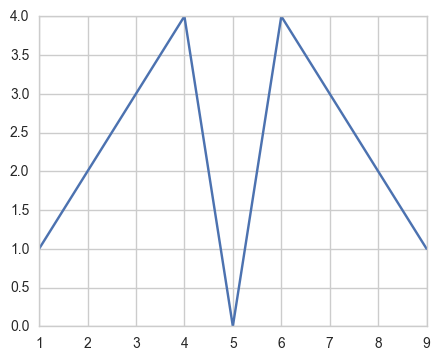

In [4]:
x = range(1,10)
y = [1,2,3,4,0,4,3,2,1]

plt.plot(x, y)

#### Plotting a line chart from a Pandas object

In [5]:
address = 'C:/Users/Lillian Pierson/Desktop/Exercise Files/Ch02/02_01/mtcars.csv'
cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
mpg = cars['mpg']

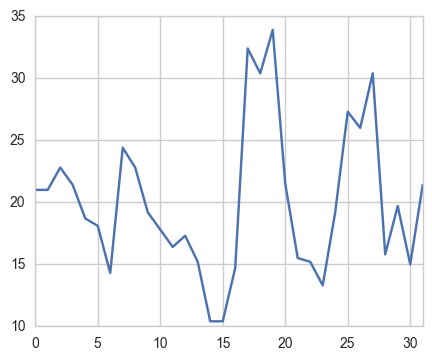

In [6]:
mpg.plot()

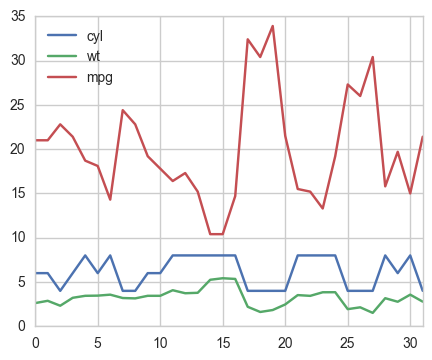

In [7]:
df = cars[['cyl', 'wt', 'mpg']]
df.plot()

### Creating bar charts
#### Creating a bar chart from a list

<Container object of 9 artists>

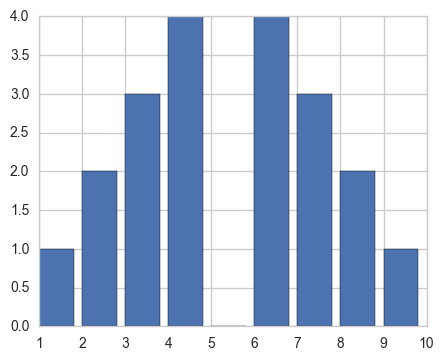

In [8]:
plt.bar(x, y)

#### Creating bar charts from Pandas objects

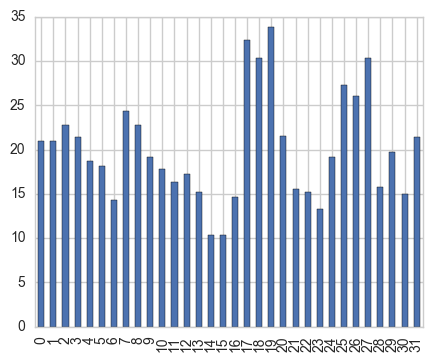

In [9]:
mpg.plot(kind='bar')

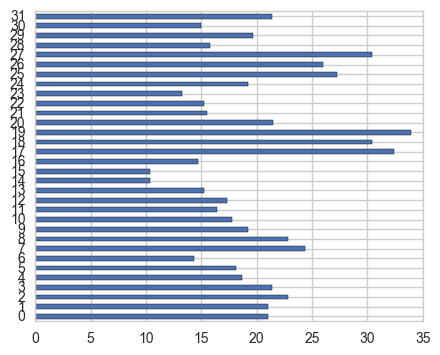

In [12]:
mpg.plot(kind='barh')

### Creating a pie chart

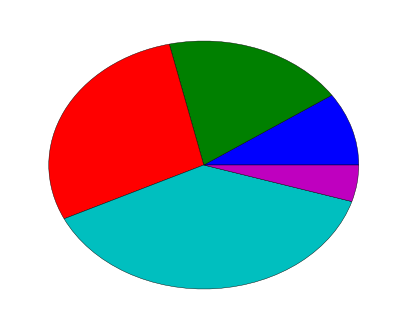

In [13]:
x = [1,2,3,4,0.5]
plt.pie(x)
plt.show()

### Saving a plot

In [14]:
plt.savefig('pie_chart.jpeg')
plt.show()

In [16]:
%pwd

u'C:\\Users\\Lillian Pierson\\Documents\\Notebooks'

![title](Header__0008_2.png "Header")
___
# Chapter 2 - Data Visualization
## Segment 2 - Defining elements of a plot

In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4

### Defining axes, ticks, and grids

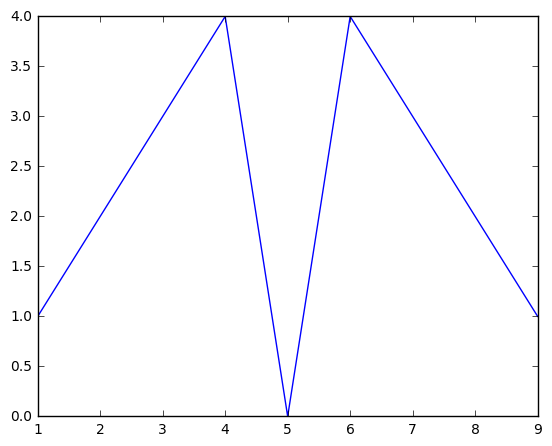

In [4]:
x = range(1,10)
y = [1,2,3,4,0,4,3,2,1]

fig = plt.figure()

ax = fig.add_axes([.1, .1, 1, 1])

ax.plot(x,y)

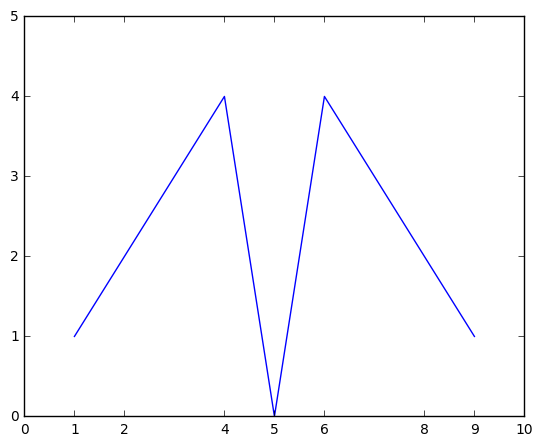

In [5]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1]) 

ax.set_xlim([1,9])
ax.set_ylim([0,5])

ax.set_xticks([0,1,2,4,5,6,8,9,10])
ax.set_yticks([0,1,2,3,4,5])

ax.plot(x,y)

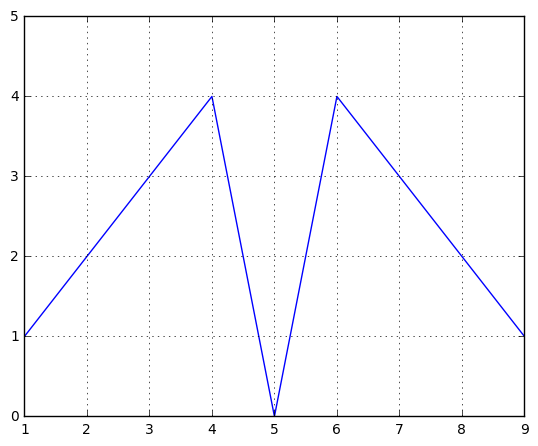

In [6]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1]) 

ax.set_xlim([1,9])
ax.set_ylim([0,5])

ax.grid()
ax.plot(x, y)

### Generating multiple plots in one figure with subplots 

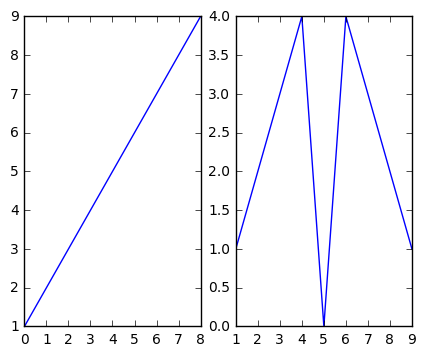

In [7]:
fig = plt.figure()
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.plot(x)
ax2.plot(x,y)

![title](Header__0008_2.png "Header")
___
# Chapter 2 - Data Visualization
## Segment 3 - Plot formatting

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
from pylab import rcParams

import seaborn as sb

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

### Defining plot color

<Container object of 9 artists>

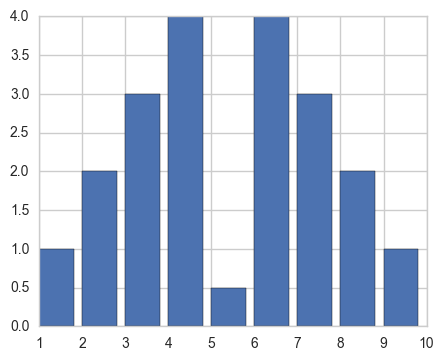

In [3]:
x = range(1, 10)
y = [1,2,3,4,0.5,4,3,2,1]

plt.bar(x, y)

<Container object of 9 artists>

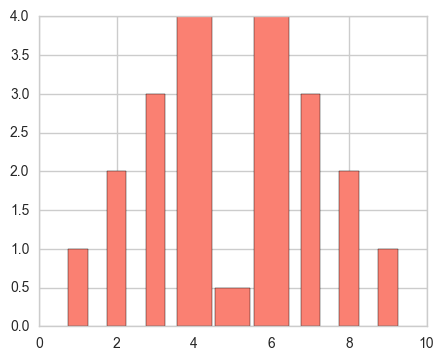

In [4]:
wide = [0.5, 0.5, 0.5, 0.9, 0.9, 0.9, 0.5, 0.5, 0.5]
color = ['salmon']
plt.bar(x, y, width=wide, color=color, align='center')

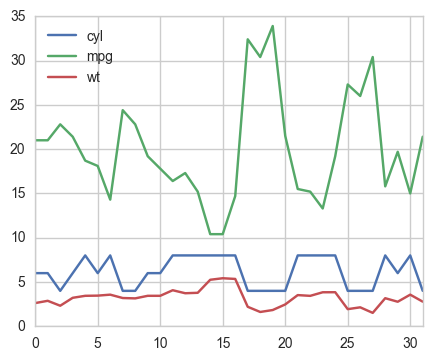

In [7]:
address = 'C:/Users/Lillian Pierson/Desktop/Exercise Files/Ch02/02_03/mtcars.csv'
cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

df = cars[['cyl', 'mpg','wt']]
df.plot()

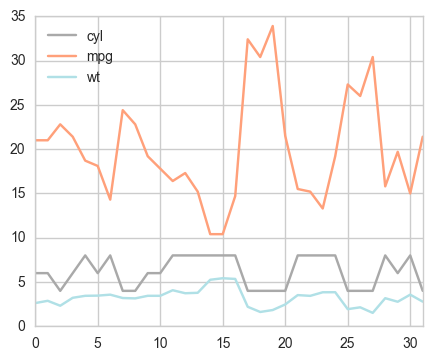

In [8]:
color_theme = ['darkgray', 'lightsalmon', 'powderblue']
df.plot(color=color_theme)

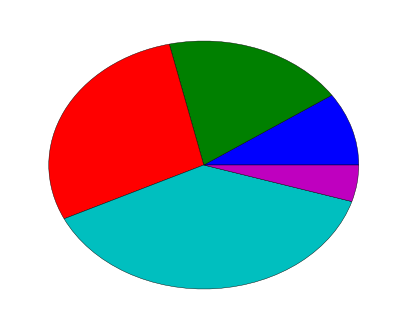

In [9]:
z = [1,2,3,4,0.5]
plt.pie(z)
plt.show()

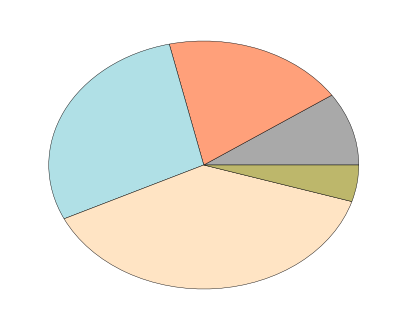

In [15]:
color_theme = ['#A9A9A9', '#FFA07A', '#B0E0E6', '#FFE4C4', '#BDB76B']
plt.pie(z, colors = color_theme)
plt.show()

### Customizing line styles

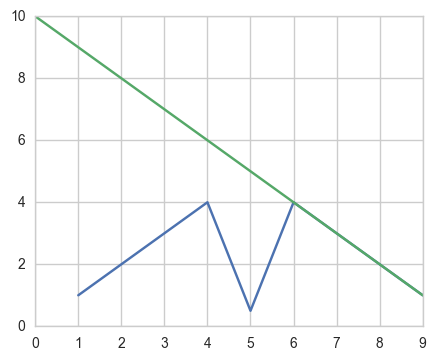

In [16]:
x1 = range(0,10)
y1 = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

plt.plot(x, y)
plt.plot(x1,y1)

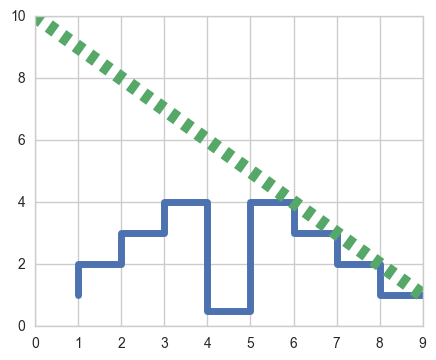

In [17]:
plt.plot(x, y, ls = 'steps', lw=5)
plt.plot(x1,y1, ls='--', lw=10)

### Setting plot markers

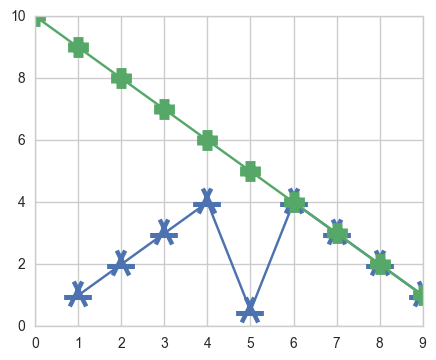

In [18]:
plt.plot(x, y, marker = '1', mew=20)
plt.plot(x1,y1, marker = '+', mew=15)

![title](Header__0008_2.png "Header")
___
# Chapter 2 - Data Visualization
## Segment 4 - Creating labels and annotations

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 8,4
sb.set_style('whitegrid')

### Labeling plot features
#### The functional method

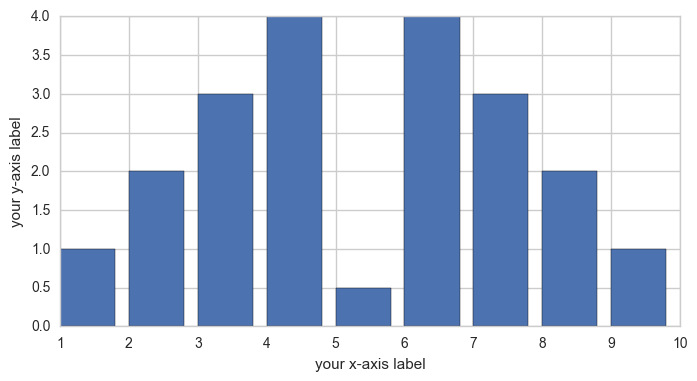

In [3]:
x = range(1,10)
y = [1,2,3,4,0.5,4,3,2,1]
plt.bar(x,y)

plt.xlabel('your x-axis label')
plt.ylabel('your y-axis label')

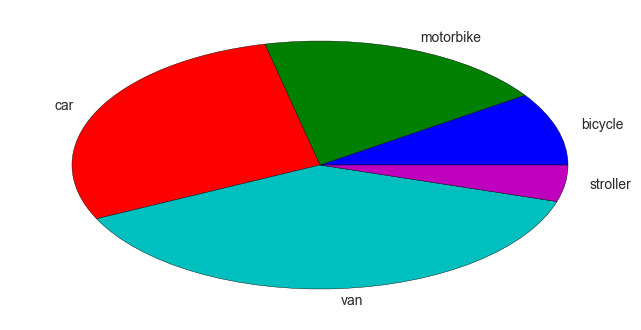

In [4]:
z = [1 , 2, 3, 4, 0.5]
veh_type = ['bicycle', 'motorbike','car', 'van', 'stroller']
plt.pie(z, labels= veh_type)
plt.show()

#### The object-oriented method

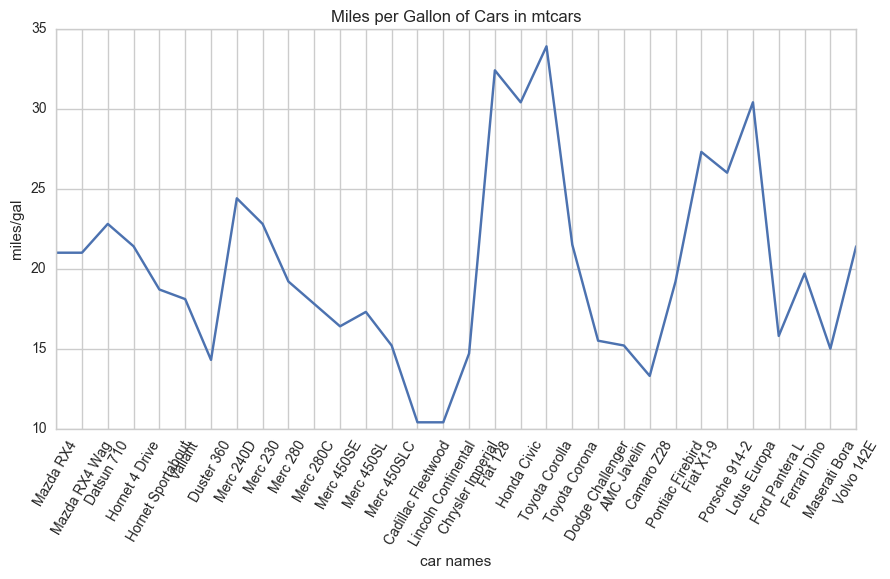

In [5]:
address = 'C:/Users/Lillian Pierson/Desktop/Exercise Files/Ch02/02_04/mtcars.csv'
cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

mpg = cars.mpg

fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])

mpg.plot()

ax.set_xticks(range(32))

ax.set_xticklabels(cars.car_names, rotation=60, fontsize='medium')
ax.set_title('Miles per Gallon of Cars in mtcars')

ax.set_xlabel('car names')
ax.set_ylabel('miles/gal')

### Adding a legend to your plot
#### The functional method

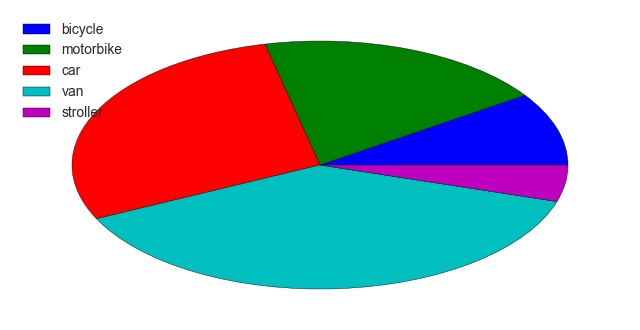

In [6]:
plt.pie(z)
plt.legend(veh_type, loc='best')
plt.show()

#### The object-oriented method

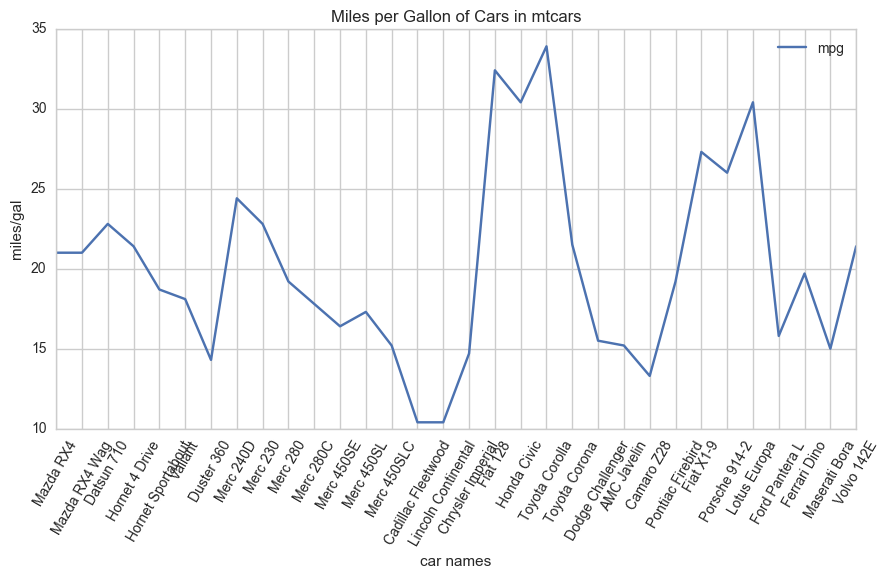

In [7]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])
mpg.plot()

ax.set_xticks(range(32))

ax.set_xticklabels(cars.car_names, rotation=60, fontsize='medium')
ax.set_title('Miles per Gallon of Cars in mtcars')

ax.set_xlabel('car names')
ax.set_ylabel('miles/gal')

ax.legend(loc='best')

### Annotating your plot

In [8]:
mpg.max()

33.899999999999999

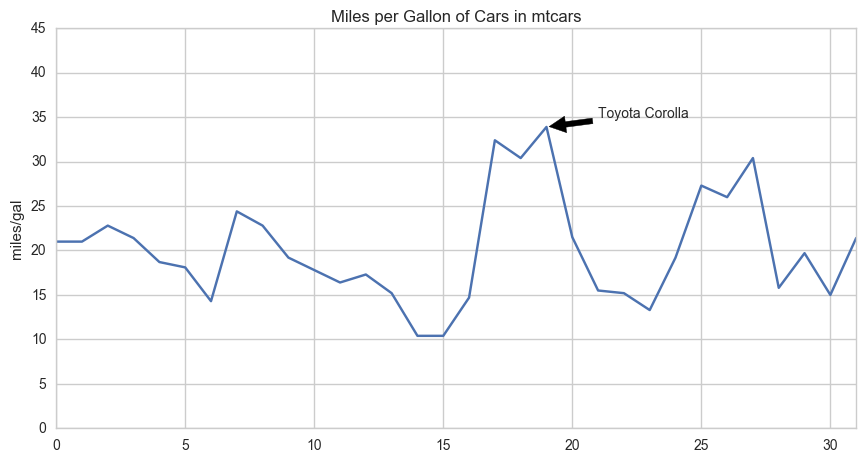

In [9]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])
mpg.plot()
ax.set_title('Miles per Gallon of Cars in mtcars')
ax.set_ylabel('miles/gal')

ax.set_ylim([0,45])

ax.annotate('Toyota Corolla', xy=(19,33.9), xytext = (21,35),
           arrowprops=dict(facecolor='black', shrink=0.05))

![title](Header__0008_2.png "Header")
___
# Chapter 2 - Data Visualization
## Segment 5 - Creating visualizations from time series data

In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

### The simplest time series plot

In [4]:
address = 'C:/Users/Lillian Pierson/Desktop/Exercise Files/Ch02/02_05/Superstore-Sales.csv'
df = pd.read_csv(address, index_col='Order Date', parse_dates=True)
df.head()

Row ID  Order ID Order Priority  Order Quantity       Sales  \
Order Date                                                                
2010-10-13       1         3            Low               6    261.5400   
2012-10-01      49       293           High              49  10123.0200   
2012-10-01      50       293           High              27    244.5700   
2011-07-10      80       483           High              30   4965.7595   
2010-08-28      85       515  Not Specified              19    394.2700   

            Discount       Ship Mode   Profit  Unit Price  Shipping Cost  \
Order Date                                                                 
2010-10-13      0.04     Regular Air  -213.25       38.94          35.00   
2012-10-01      0.07  Delivery Truck   457.81      208.16          68.02   
2012-10-01      0.01     Regular Air    46.71        8.69           2.99   
2011-07-10      0.08     Regular Air  1198.97      195.99           3.99   
2010-08-28      0.08     Regular Air    30.94       21.78           5.94   

                 Customer Name Province   Region Customer Segment  \
Order Date                                                          
2010-10-13  Muhammed MacIntyre  Nunavut  Nunavut   Small Business   
2012-10-01        Barry French  Nunavut  Nunavut         Consumer   
2012-10-01        Barry French  Nunavut  Nunavut         Consumer   
2011-07-10       Clay Rozendal  Nunavut  Nunavut        Corporate   
2010-08-28      Carlos Soltero  Nunavut  Nunavut         Consumer   

           Product Category            Product Sub-Category  \
Order Date                                                    
2010-10-13  Office Supplies          Storage & Organization   
2012-10-01  Office Supplies                      Appliances   
2012-10-01  Office Supplies  Binders and Binder Accessories   
2011-07-10       Technology    Telephones and Communication   
2010-08-28  Office Supplies                      Appliances   

                                                 Product Name  \
Order Date                                                      
2010-10-13   Eldon Base for stackable storage shelf, platinum   
2012-10-01  1.7 Cubic Foot Compact "Cube" Office Refrigera...   
2012-10-01   Cardinal Slant-D� Ring Binder, Heavy Gauge Vinyl   
2011-07-10                                               R380   
2010-08-28                           Holmes HEPA Air Purifier   

           Product Container  Product Base Margin   Ship Date  
Order Date                                                     
2010-10-13         Large Box                 0.80  10/20/2010  
2012-10-01        Jumbo Drum                 0.58   10/2/2012  
2012-10-01         Small Box                 0.39   10/3/2012  
2011-07-10         Small Box                 0.58   7/12/2011  
2010-08-28        Medium Box                 0.50   8/30/2010

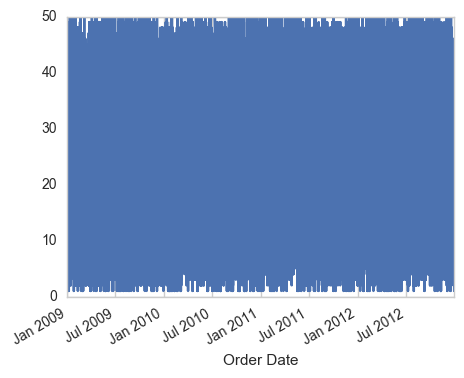

In [5]:
df['Order Quantity'].plot()

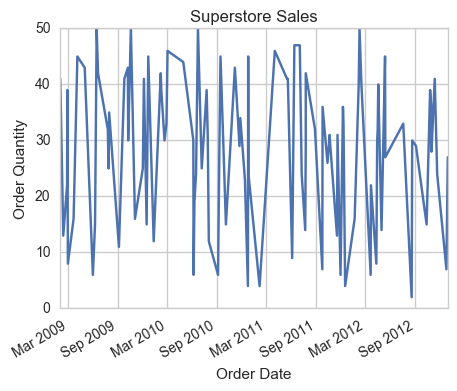

In [8]:
df2 = df.sample(n=100, random_state=25, axis=0)

plt.xlabel('Order Date')
plt.ylabel('Order Quantity')
plt.title('Superstore Sales')

df2['Order Quantity'].plot()

![title](Header__0008_2.png "Header")
___
# Chapter 2 - Data Visualization
## Segment 6 - Constructing histograms, box plots, and scatter plots

In [9]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

from pandas.tools.plotting import scatter_matrix

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

In [10]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

### Eyeballing dataset distributions with histograms

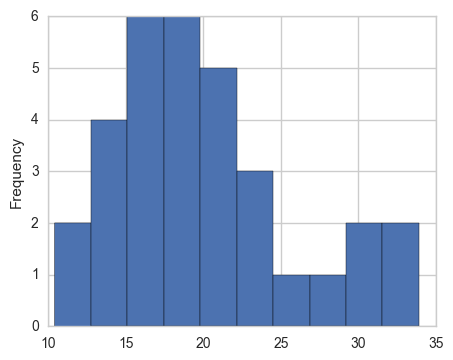

In [3]:
address = 'C:/Users/Lillian Pierson/Desktop/Exercise Files/Ch02/02_06/mtcars.csv'
cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
cars.index = cars.car_names
mpg = cars['mpg']

mpg.plot(kind='hist')

[]

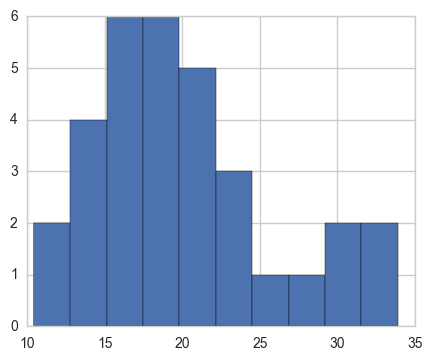

In [4]:
plt.hist(mpg)
plt.plot()

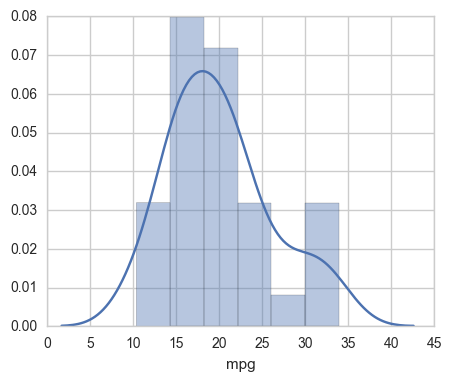

In [5]:
sb.distplot(mpg)

###  Seeing scatterplots in action

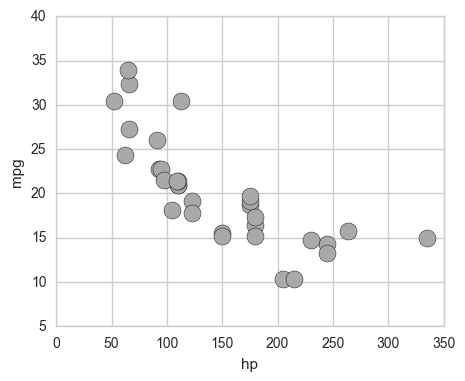

In [6]:
cars.plot(kind='scatter', x='hp', y='mpg', c=['darkgray'], s=150)

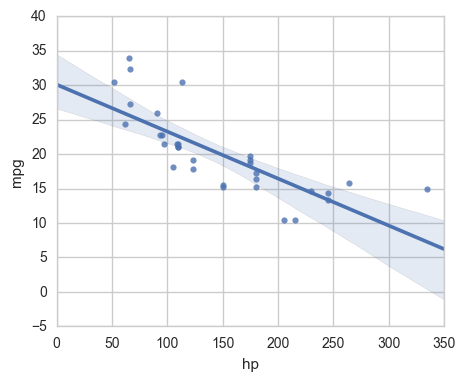

In [7]:
sb.regplot(x='hp', y='mpg', data=cars, scatter=True)

### Generating a scatter plot matrix

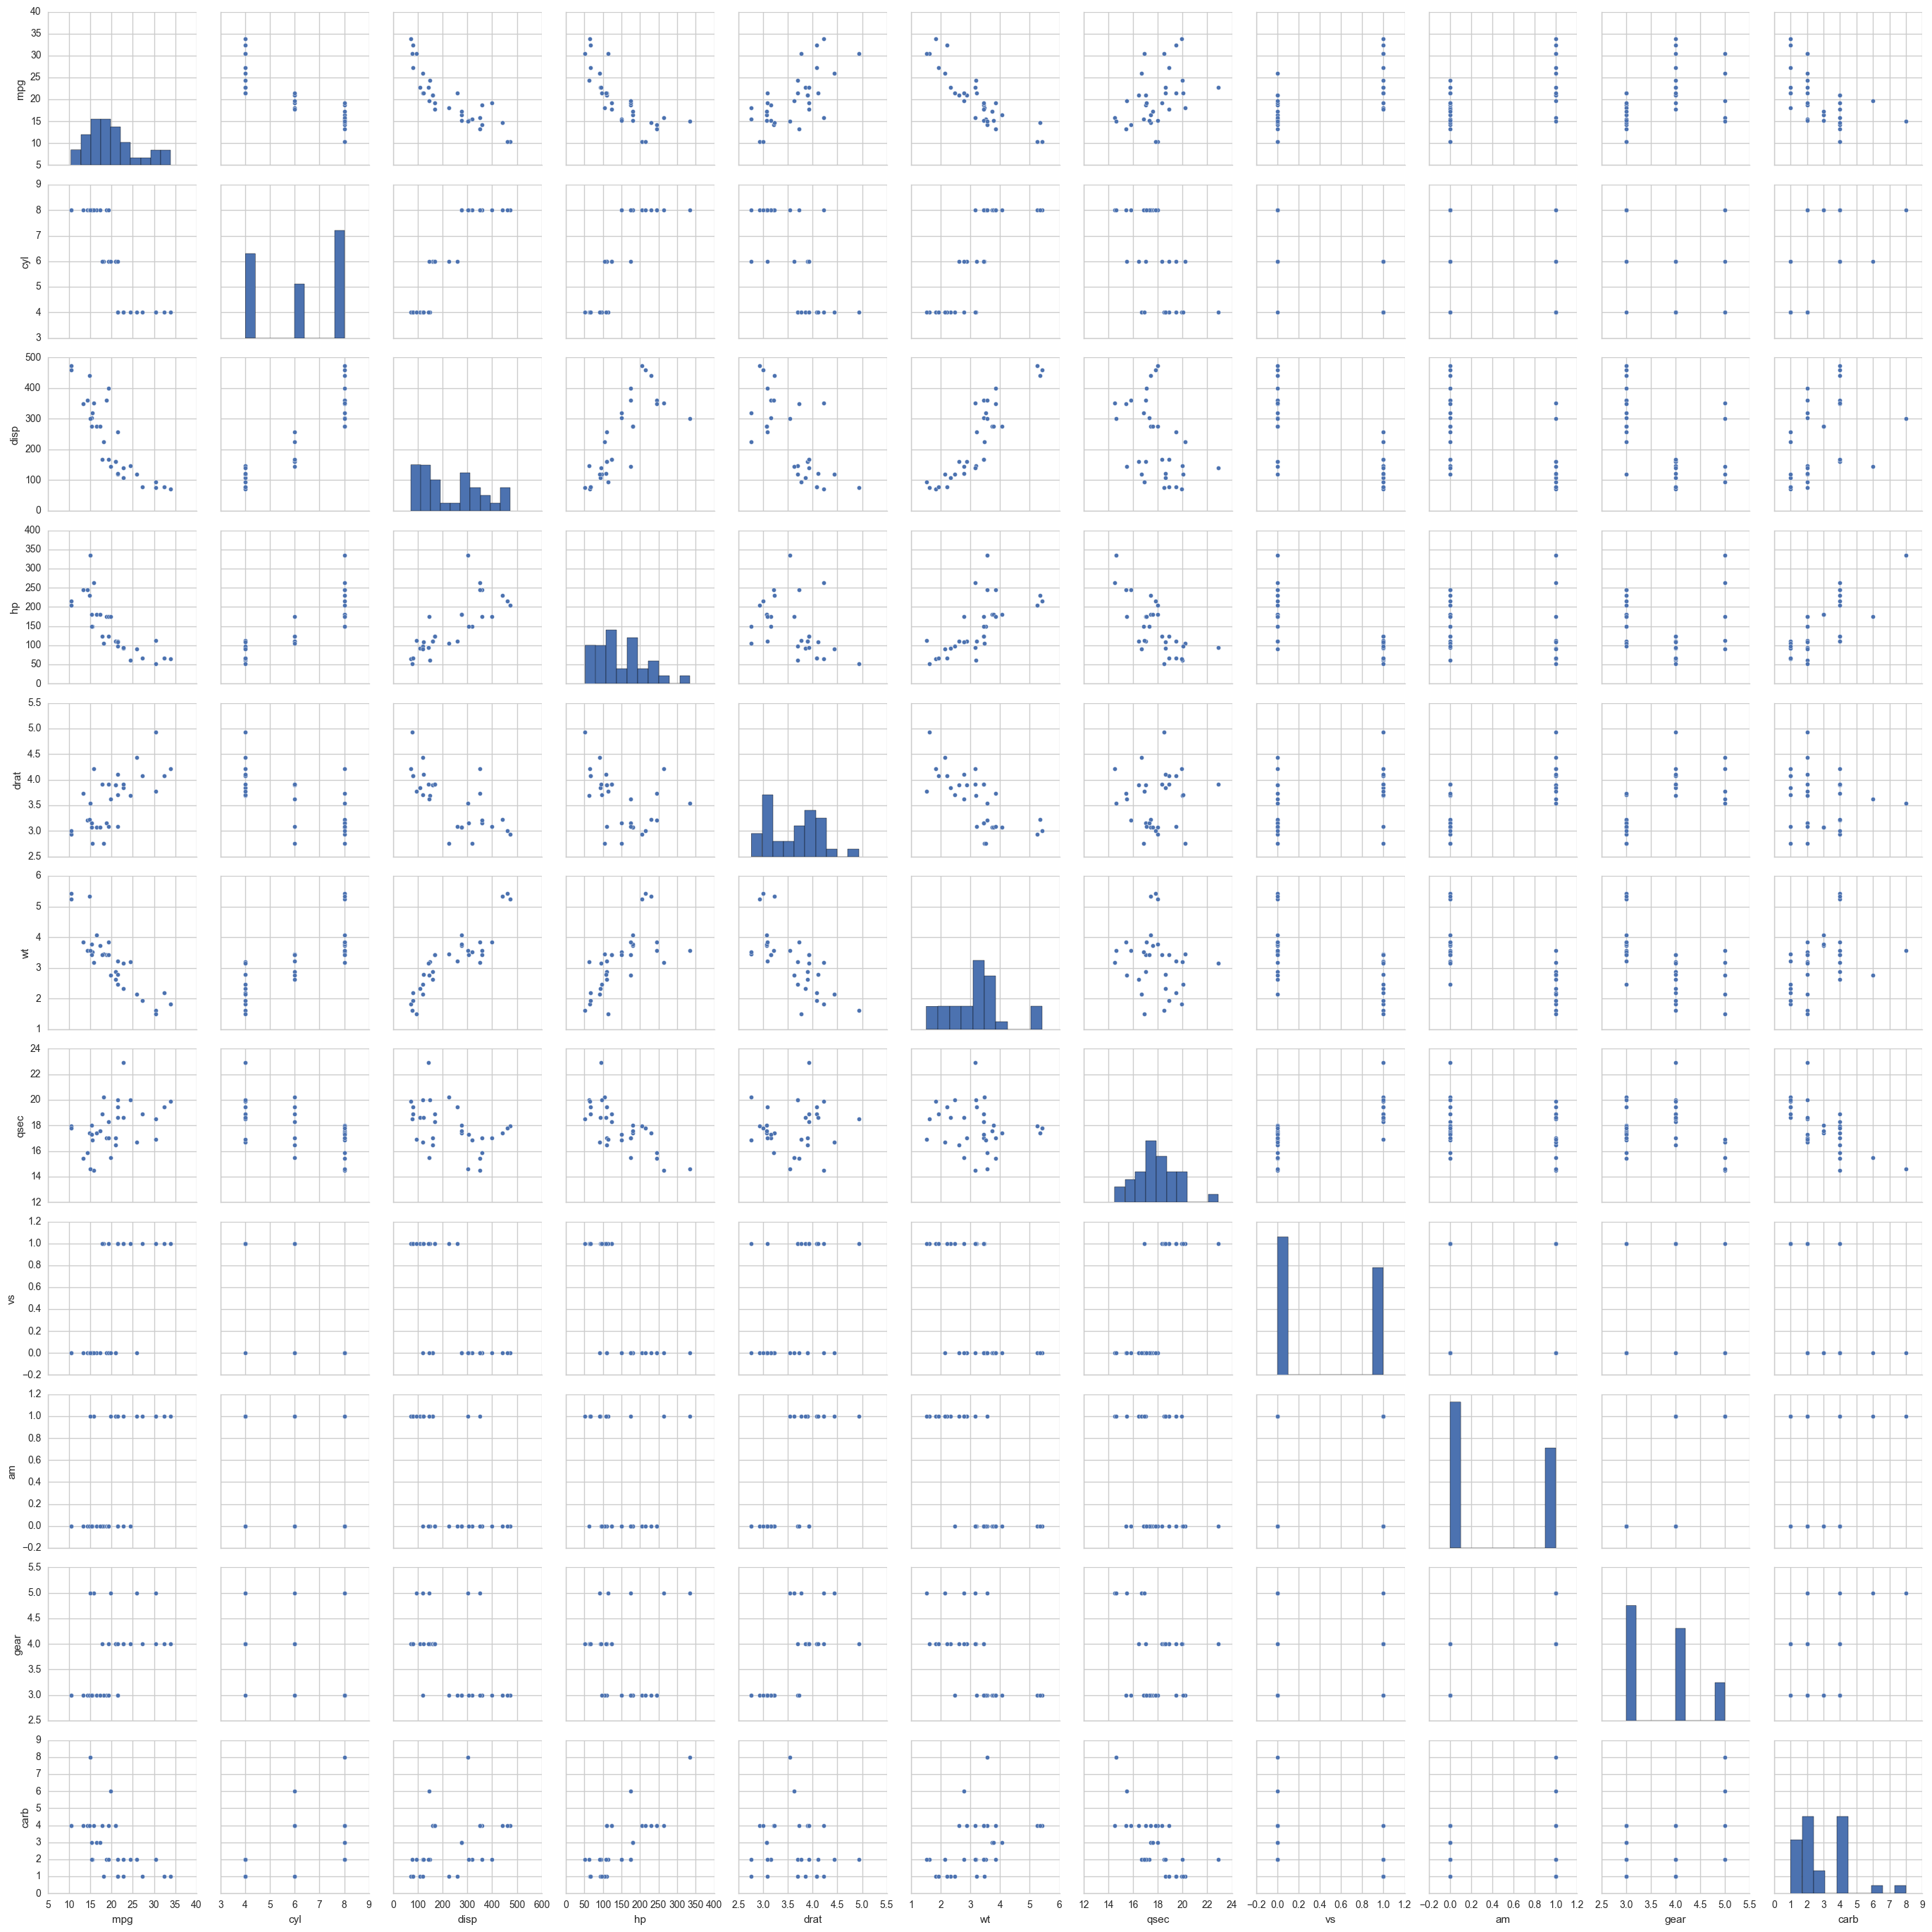

In [8]:
sb.pairplot(cars)

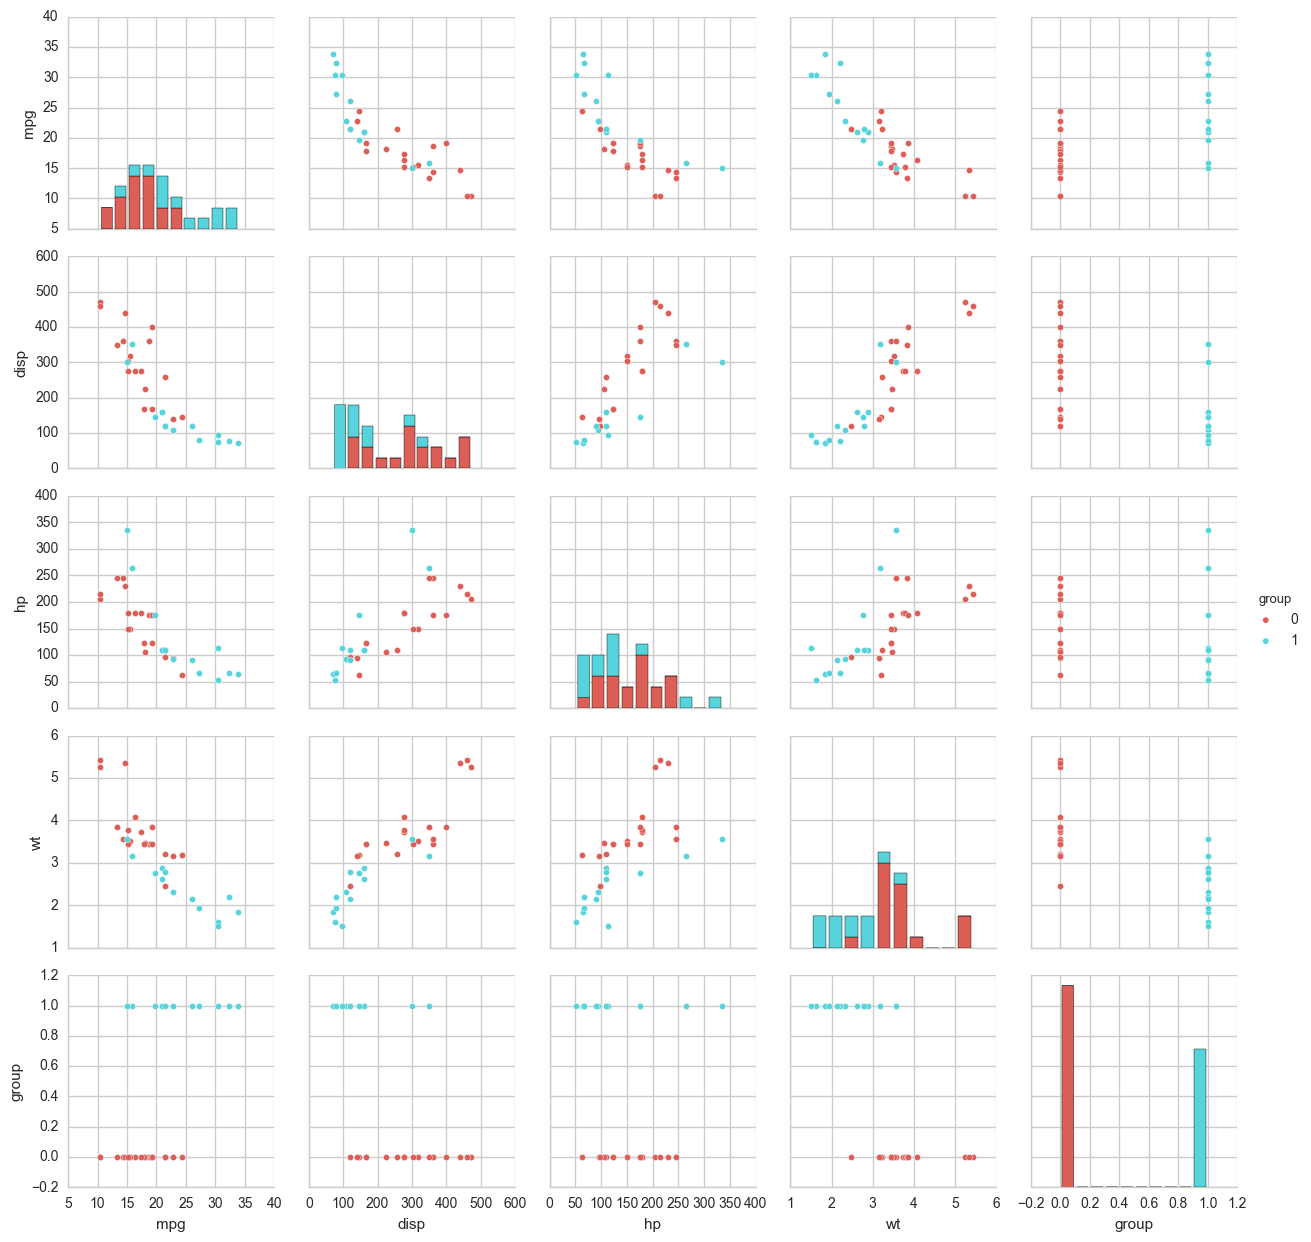

In [14]:
cars_df = pd.DataFrame((cars.ix[:,(1,3,4,6)].values), columns = ['mpg', 'disp', 'hp', 'wt'])
cars_target = cars.ix[:,9].values
target_names = [0, 1]

cars_df['group'] = pd.Series(cars_target, dtype="category")
sb.pairplot(cars_df, hue='group', palette='hls')

### Building boxplots

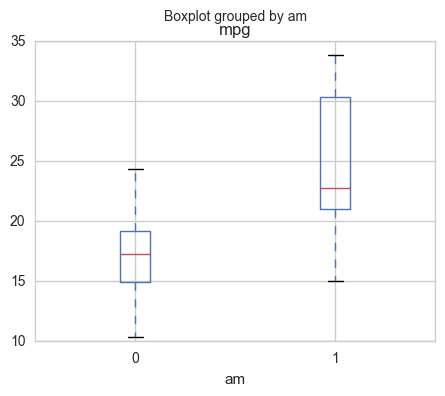

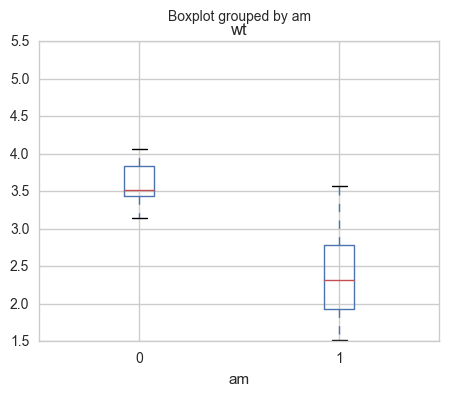

In [15]:
cars.boxplot(column='mpg', by='am')
cars.boxplot(column='wt', by='am')

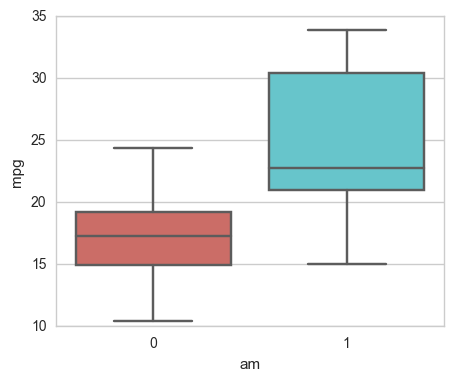

In [16]:
sb.boxplot(x='am', y='mpg', data=cars, palette='hls')

![title](Header__0007_3.png "Header")
___
# Chapter 3 - Basic Math and Statistics
## Segment 1 - Using NumPy to perform arithmetic operations on data

In [1]:
import numpy as np
from numpy.random import randn

In [2]:
np.set_printoptions(precision=2)

## Creating arrays
### Creating arrays using a list

In [3]:
a = np.array([1,2,3,4,5,6])
a

array([1, 2, 3, 4, 5, 6])

In [4]:
b = np.array([[10,20,30], [40,50,60]])
b

array([[10, 20, 30],
       [40, 50, 60]])

### Creating arrays via assignment

In [5]:
np.random.seed(25)
c = 36*np.random.randn(6)
c

array([  8.22,  36.97, -30.23, -21.28, -34.45,  -8.  ])

In [6]:
d = np.arange(1,35)
d

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])

## Performing arthimetic on arrays

In [7]:
a * 10

array([10, 20, 30, 40, 50, 60])

In [8]:
c + a

array([  9.22,  38.97, -27.23, -17.28, -29.45,  -2.  ])

In [9]:
c - a

array([  7.22,  34.97, -33.23, -25.28, -39.45, -14.  ])

In [10]:
c * a

array([   8.22,   73.94,  -90.68,  -85.13, -172.24,  -48.02])

In [11]:
c / a

array([  8.22,  18.48, -10.08,  -5.32,  -6.89,  -1.33])

### Multiplying matrices and basic linear algebra

In [12]:
aa = np.array([[2.,4.,6.], [1.,3.,5.], [10.,20.,30.]])
aa

array([[  2.,   4.,   6.],
       [  1.,   3.,   5.],
       [ 10.,  20.,  30.]])

In [13]:
bb = np.array([[0.,1.,2.], [3.,4.,5.], [6.,7.,8.]])
bb

array([[ 0.,  1.,  2.],
       [ 3.,  4.,  5.],
       [ 6.,  7.,  8.]])

In [14]:
aa*bb

array([[   0.,    4.,   12.],
       [   3.,   12.,   25.],
       [  60.,  140.,  240.]])

In [16]:
np.dot(aa,bb)

array([[  48.,   60.,   72.],
       [  39.,   48.,   57.],
       [ 240.,  300.,  360.]])

![title](Header__0007_3.png "Header")
___

# Chapter 3 - Basic Math and Statistics
## Segment 2 - Generating summary statistics using pandas and scipy

In [17]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import scipy
from scipy import stats

In [ ]:
address = 'C:/Users/Lillian Pierson/Desktop/Exercise Files/Ch01/01_05/mtcars.csv'
cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

cars.head()

### Looking at summary statistics that decribe a variable's numeric values

In [20]:
cars.sum()

car_names    Mazda RX4Mazda RX4 WagDatsun 710Hornet 4 Drive...
mpg                                                      642.9
cyl                                                        198
disp                                                    7383.1
hp                                                        4694
drat                                                    115.09
wt                                                     102.952
qsec                                                    571.16
vs                                                          14
am                                                          13
gear                                                       118
carb                                                        90
dtype: object

In [21]:
cars.sum(axis=1)

0     328.980
1     329.795
2     259.580
3     426.135
4     590.310
5     385.540
6     656.920
7     270.980
8     299.570
9     350.460
10    349.660
11    510.740
12    511.500
13    509.850
14    728.560
15    726.644
16    725.695
17    213.850
18    195.165
19    206.955
20    273.775
21    519.650
22    506.085
23    646.280
24    631.175
25    208.215
26    272.570
27    273.683
28    670.690
29    379.590
30    694.710
31    288.890
dtype: float64

In [22]:
cars.median()

mpg      19.200
cyl       6.000
disp    196.300
hp      123.000
drat      3.695
wt        3.325
qsec     17.710
vs        0.000
am        0.000
gear      4.000
carb      2.000
dtype: float64

In [23]:
cars.mean()

mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64

In [24]:
cars.max()

car_names    Volvo 142E
mpg                33.9
cyl                   8
disp                472
hp                  335
drat               4.93
wt                5.424
qsec               22.9
vs                    1
am                    1
gear                  5
carb                  8
dtype: object

In [29]:
mpg = cars.mpg
mpg.idxmax()

19

### Looking at summary statistics that describe variable distribution

In [31]:
cars.std()

mpg       6.026948
cyl       1.785922
disp    123.938694
hp       68.562868
drat      0.534679
wt        0.978457
qsec      1.786943
vs        0.504016
am        0.498991
gear      0.737804
carb      1.615200
dtype: float64

In [32]:
cars.var()

mpg        36.324103
cyl         3.189516
disp    15360.799829
hp       4700.866935
drat        0.285881
wt          0.957379
qsec        3.193166
vs          0.254032
am          0.248992
gear        0.544355
carb        2.608871
dtype: float64

In [33]:
gear = cars.gear
gear.value_counts()

3    15
4    12
5     5
Name: gear, dtype: int64

In [34]:
cars.describe()

mpg        cyl        disp          hp       drat         wt  \
count  32.000000  32.000000   32.000000   32.000000  32.000000  32.000000   
mean   20.090625   6.187500  230.721875  146.687500   3.596563   3.217250   
std     6.026948   1.785922  123.938694   68.562868   0.534679   0.978457   
min    10.400000   4.000000   71.100000   52.000000   2.760000   1.513000   
25%    15.425000   4.000000  120.825000   96.500000   3.080000   2.581250   
50%    19.200000   6.000000  196.300000  123.000000   3.695000   3.325000   
75%    22.800000   8.000000  326.000000  180.000000   3.920000   3.610000   
max    33.900000   8.000000  472.000000  335.000000   4.930000   5.424000   

            qsec         vs         am       gear     carb  
count  32.000000  32.000000  32.000000  32.000000  32.0000  
mean   17.848750   0.437500   0.406250   3.687500   2.8125  
std     1.786943   0.504016   0.498991   0.737804   1.6152  
min    14.500000   0.000000   0.000000   3.000000   1.0000  
25%    16.892500   0.000000   0.000000   3.000000   2.0000  
50%    17.710000   0.000000   0.000000   4.000000   2.0000  
75%    18.900000   1.000000   1.000000   4.000000   4.0000  
max    22.900000   1.000000   1.000000   5.000000   8.0000

![title](Header__0007_3.png "Header")
___

# Chapter 3 - Basic Math and Statistics
## Segment 3 - Summarizing categorical data using pandas

In [1]:
import numpy as np
import pandas as pd

### The basics

In [2]:
address = 'C:/Users/Lillian Pierson/Desktop/Exercise Files/Ch01/01_05/mtcars.csv'
cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
cars.index = cars.car_names
cars.head(15)

car_names   mpg  cyl   disp   hp  drat     wt  \
car_names                                                                    
Mazda RX4                    Mazda RX4  21.0    6  160.0  110  3.90  2.620   
Mazda RX4 Wag            Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875   
Datsun 710                  Datsun 710  22.8    4  108.0   93  3.85  2.320   
Hornet 4 Drive          Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215   
Hornet Sportabout    Hornet Sportabout  18.7    8  360.0  175  3.15  3.440   
Valiant                        Valiant  18.1    6  225.0  105  2.76  3.460   
Duster 360                  Duster 360  14.3    8  360.0  245  3.21  3.570   
Merc 240D                    Merc 240D  24.4    4  146.7   62  3.69  3.190   
Merc 230                      Merc 230  22.8    4  140.8   95  3.92  3.150   
Merc 280                      Merc 280  19.2    6  167.6  123  3.92  3.440   
Merc 280C                    Merc 280C  17.8    6  167.6  123  3.92  3.440   
Merc 450SE                  Merc 450SE  16.4    8  275.8  180  3.07  4.070   
Merc 450SL                  Merc 450SL  17.3    8  275.8  180  3.07  3.730   
Merc 450SLC                Merc 450SLC  15.2    8  275.8  180  3.07  3.780   
Cadillac Fleetwood  Cadillac Fleetwood  10.4    8  472.0  205  2.93  5.250   

                     qsec  vs  am  gear  carb  
car_names                                      
Mazda RX4           16.46   0   1     4     4  
Mazda RX4 Wag       17.02   0   1     4     4  
Datsun 710          18.61   1   1     4     1  
Hornet 4 Drive      19.44   1   0     3     1  
Hornet Sportabout   17.02   0   0     3     2  
Valiant             20.22   1   0     3     1  
Duster 360          15.84   0   0     3     4  
Merc 240D           20.00   1   0     4     2  
Merc 230            22.90   1   0     4     2  
Merc 280            18.30   1   0     4     4  
Merc 280C           18.90   1   0     4     4  
Merc 450SE          17.40   0   0     3     3  
Merc 450SL          17.60   0   0     3     3  
Merc 450SLC         18.00   0   0     3     3  
Cadillac Fleetwood  17.98   0   0     3     4

In [7]:
# object_name.value_counts()
# ♔┈♔┈♔┈( WHAT THIS DOES )┈♔┈♔┈♔
# The .value_counts() method makes a count of all unique values in an array or Series object. 


In [8]:
carb = cars.carb
carb.value_counts()

4    10
2    10
1     7
3     3
8     1
6     1
Name: carb, dtype: int64

In [9]:
# object_name.groupby('column_index')
# ♔┈♔┈♔┈( WHAT THIS DOES )┈♔┈♔┈♔
# To group a DataFrame by its values in a particular column, call the .groupby() method off of the DataFrame, and then pass
# in the index value of the column Series you want the DataFrame to be grouped by.
cars_cat = cars[['cyl','vs','am','gear','carb']]
cars_cat.head()


cyl  vs  am  gear  carb
car_names                                 
Mazda RX4            6   0   1     4     4
Mazda RX4 Wag        6   0   1     4     4
Datsun 710           4   1   1     4     1
Hornet 4 Drive       6   1   0     3     1
Hornet Sportabout    8   0   0     3     2

In [10]:
gears_group = cars_cat.groupby('gear')
gears_group.describe()

am       carb        cyl         vs
gear                                                  
3    count  15.000000  15.000000  15.000000  15.000000
     mean    0.000000   2.666667   7.466667   0.200000
     std     0.000000   1.175139   1.187234   0.414039
     min     0.000000   1.000000   4.000000   0.000000
     25%     0.000000   2.000000   8.000000   0.000000
     50%     0.000000   3.000000   8.000000   0.000000
     75%     0.000000   4.000000   8.000000   0.000000
     max     0.000000   4.000000   8.000000   1.000000
4    count  12.000000  12.000000  12.000000  12.000000
     mean    0.666667   2.333333   4.666667   0.833333
     std     0.492366   1.302678   0.984732   0.389249
     min     0.000000   1.000000   4.000000   0.000000
     25%     0.000000   1.000000   4.000000   1.000000
     50%     1.000000   2.000000   4.000000   1.000000
     75%     1.000000   4.000000   6.000000   1.000000
     max     1.000000   4.000000   6.000000   1.000000
5    count   5.000000   5.000000   5.000000   5.000000
     mean    1.000000   4.400000   6.000000   0.200000
     std     0.000000   2.607681   2.000000   0.447214
     min     1.000000   2.000000   4.000000   0.000000
     25%     1.000000   2.000000   4.000000   0.000000
     50%     1.000000   4.000000   6.000000   0.000000
     75%     1.000000   6.000000   8.000000   0.000000
     max     1.000000   8.000000   8.000000   1.000000

### Transforming variables to categorical data type

In [12]:
# pd.Series(x_variable, dtype)
# ♔┈♔┈♔┈( WHAT THIS DOES )┈♔┈♔┈♔
# To create a Series of categorical data type, call the pd.Series() function on the array or Series that holds the data you
# want the new Series object to contain. When you pass in the dtype="category" argument, this tells Python to assign the new
# Series a data type of "category". Here we create a new categorical Series from the gear variable, and then assign it to a
# new column in the cars DataFrame, called 'group'.
cars['group'] = pd.Series(cars.gear, dtype="category")

In [13]:
cars['group'].dtypes

category

In [14]:
cars['group'].value_counts()

3    15
4    12
5     5
Name: group, dtype: int64

### Describing categorical data with crosstabs

In [15]:
# pd.crosstab(y_variable, x_variable)
# ♔┈♔┈♔┈( WHAT THIS DOES )┈♔┈♔┈♔
# To create a cross-tab, just call the pd.crosstab() function on the variables you want included in 
# the output table.
pd.crosstab(cars['am'], cars['gear'])

gear   3  4  5
am            
0     15  4  0
1      0  8  5

![title](Header__0007_3.png "Header")
___
# Chapter 3 - Exploring correlation between variables

## Segment 4 - Starting with parametric methods in pandas and scipy

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams

import scipy
from scipy.stats.stats import pearsonr

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 8, 4
plt.style.use('seaborn-whitegrid')

### The Pearson Correlation

In [3]:
address = 'C:/Users/Lillian Pierson/Desktop/Exercise Files/Ch03/03_04/mtcars.csv'
cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

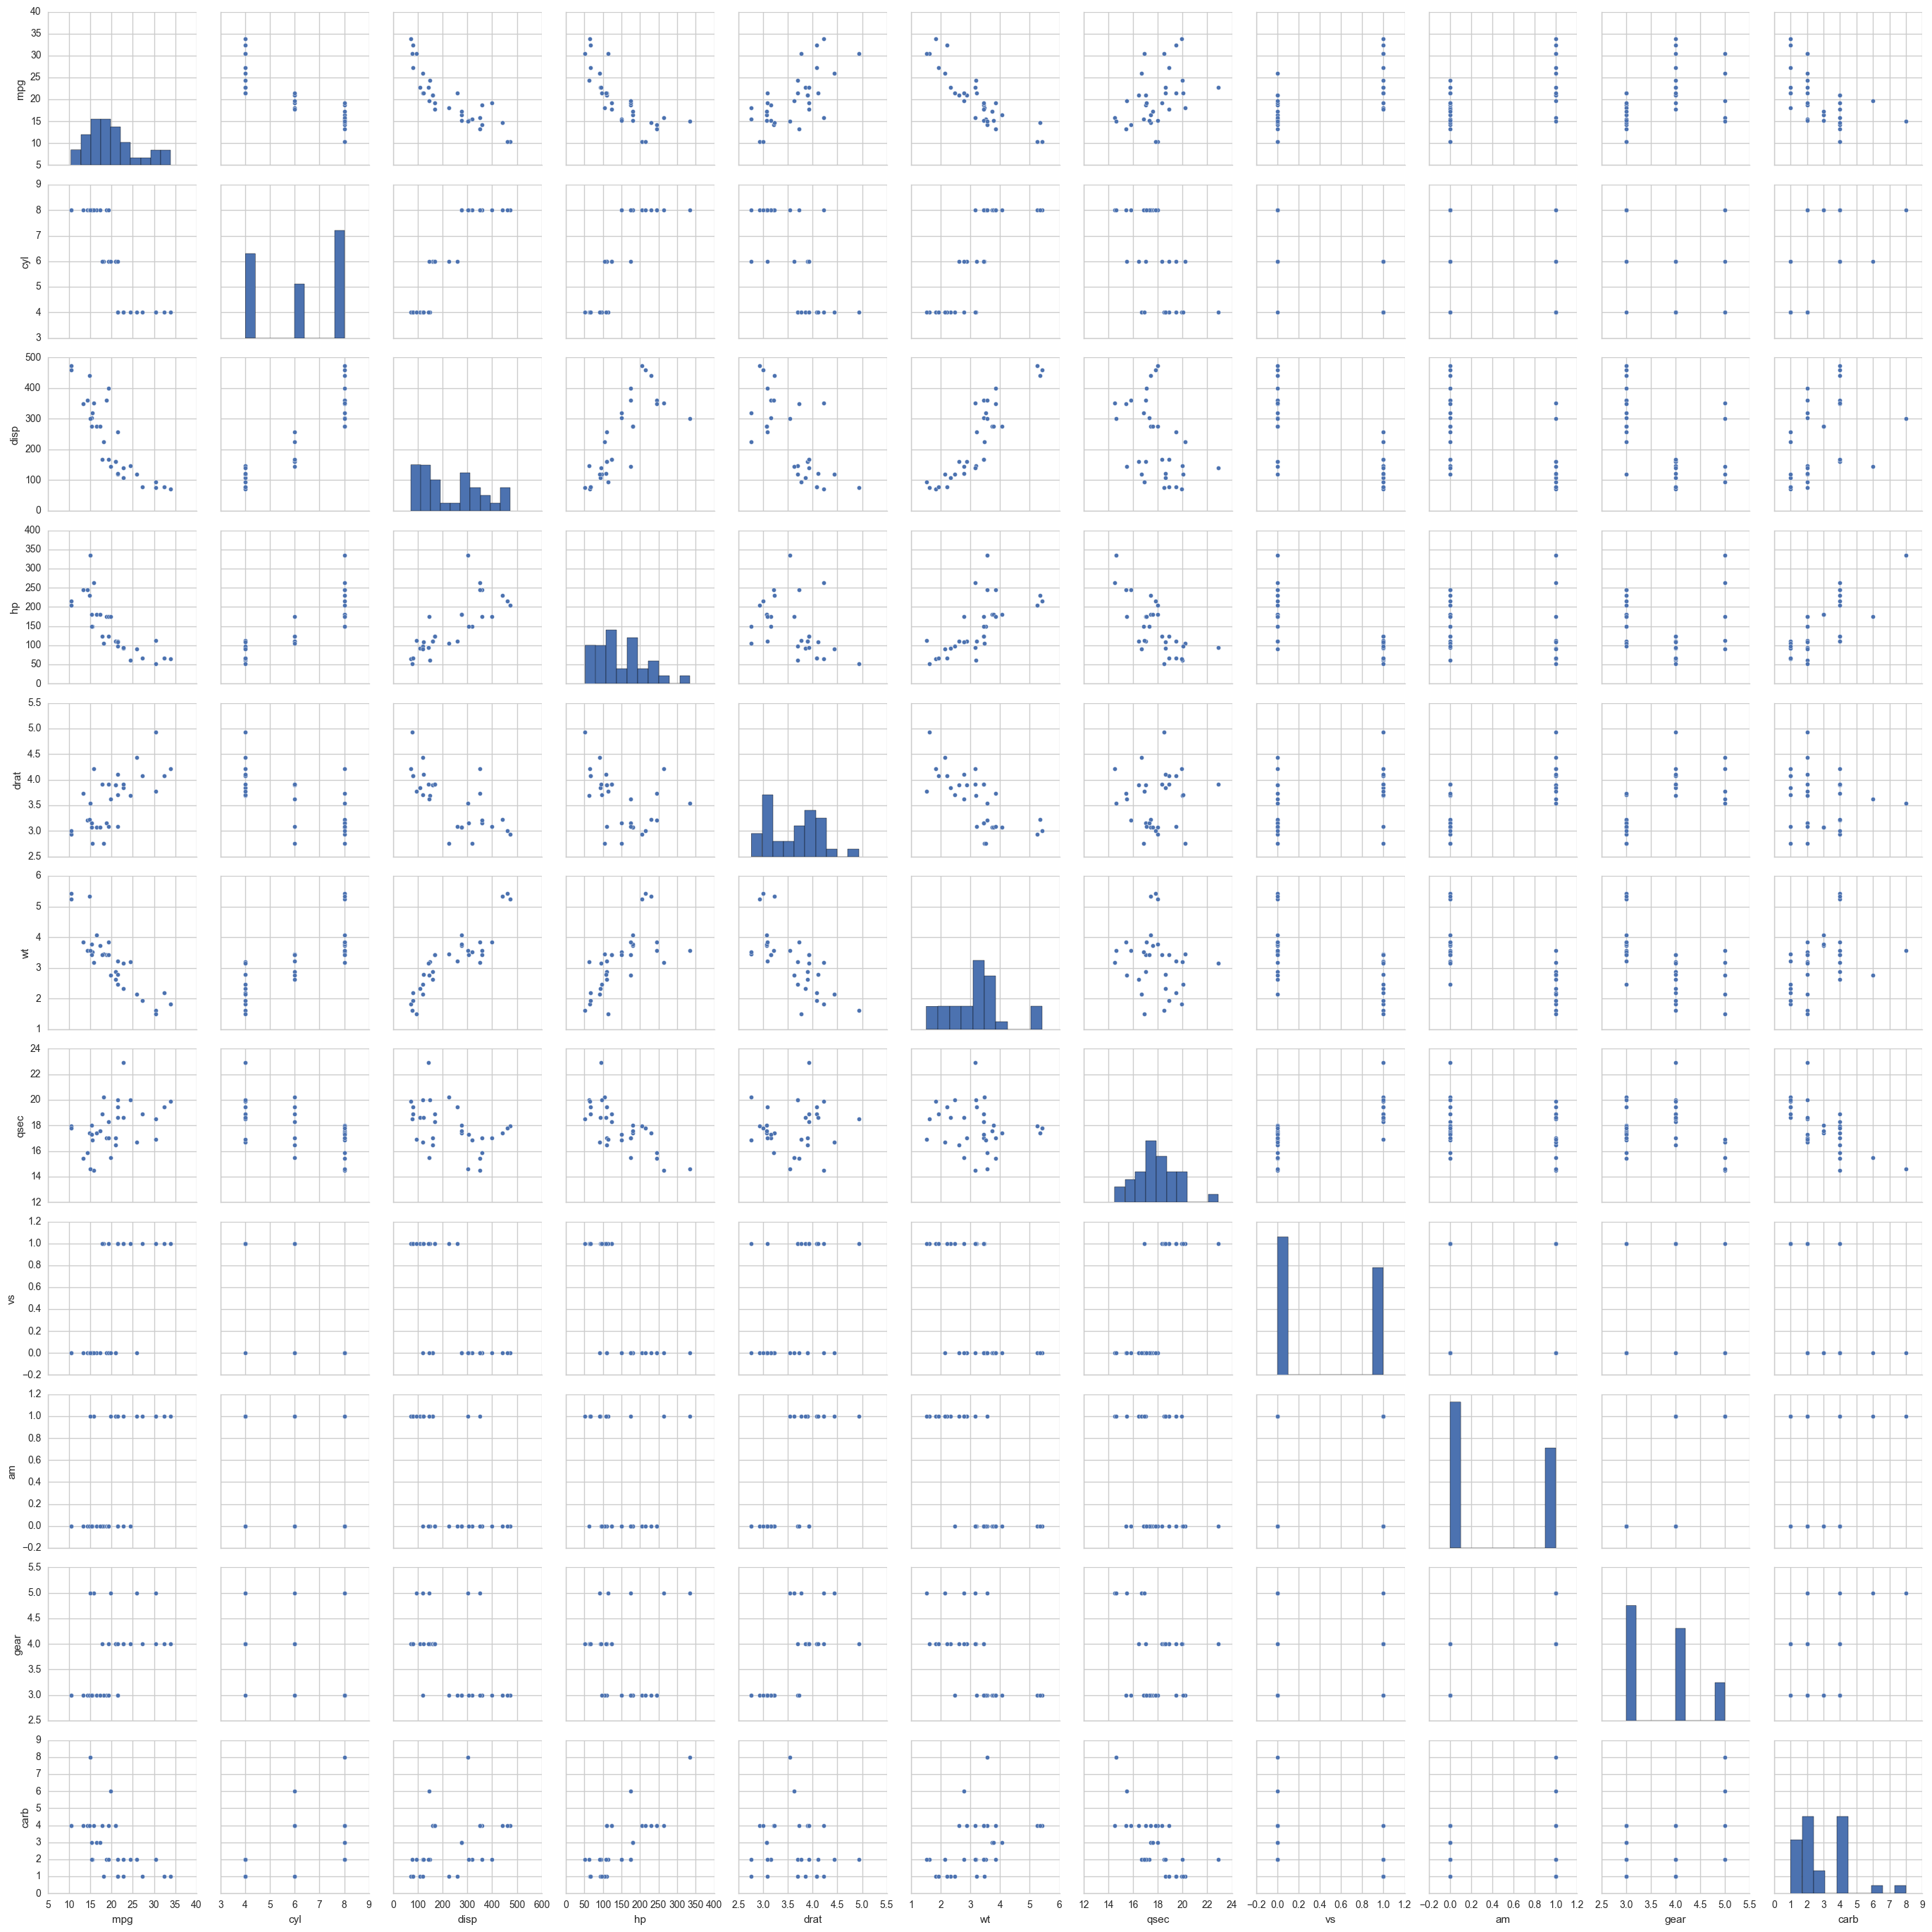

In [4]:
sb.pairplot(cars)

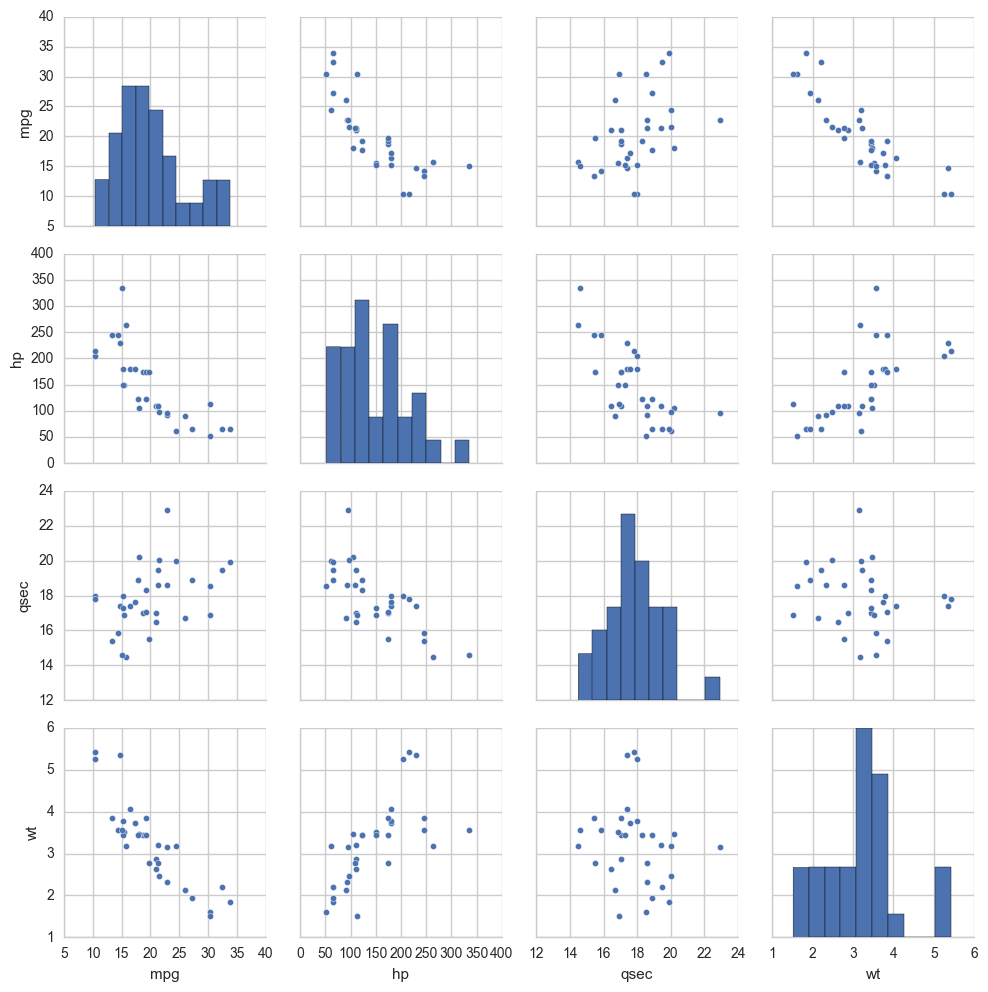

In [7]:
X = cars[['mpg', 'hp', 'qsec','wt']]
sb.pairplot(X)

### Using scipy to calculate the Pearson correlation coefficient

mpg = cars['mpg']
hp = cars['hp']
qsec = cars['qsec']
wt = cars['wt']

pearsonr_coefficient, p_value = pearsonr(mpg, hp)
print 'PearsonR Correlation Coefficient %0.3f' % (pearsonr_coefficient)

In [12]:
pearsonr_coefficient, p_value = pearsonr(mpg, qsec)
print 'PearsonR Correlation Coefficient %0.3f' % (pearsonr_coefficient)

PearsonR Correlation Coefficient 0.419


In [13]:
pearsonr_coefficient, p_value = pearsonr(mpg, wt)
print 'PearsonR Correlation Coefficient %0.3f' % (pearsonr_coefficient)

PearsonR Correlation Coefficient -0.868


### Using pandas to calculate the Pearson correlation coefficient

In [14]:
corr = X.corr()
corr

mpg        hp      qsec        wt
mpg   1.000000 -0.776168  0.418684 -0.867659
hp   -0.776168  1.000000 -0.708223  0.658748
qsec  0.418684 -0.708223  1.000000 -0.174716
wt   -0.867659  0.658748 -0.174716  1.000000

### Using Seaborn to visualize the Pearson correlation coefficient

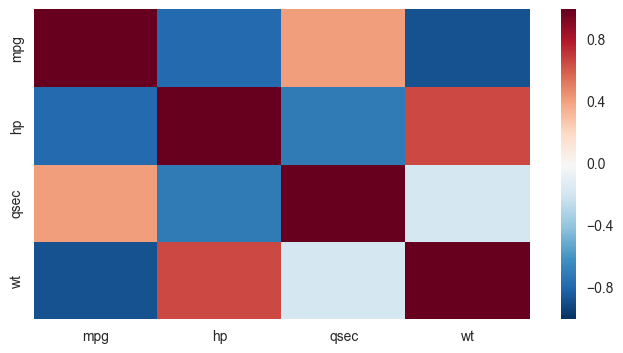

In [16]:
sb.heatmap(corr,xticklabels=corr.columns.values, yticklabels=corr.columns.values)

![title](Header__0007_3.png "Header")
___
# Chapter 3 - Exploring correlation between variables
## Segment 5 - Delving into non-parametric methods using pandas and scipy

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams

import scipy
from scipy.stats import spearmanr

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 14, 7
plt.style.use('seaborn-whitegrid')

### The Spearman Rank Correlation

In [3]:
address = 'C:/Users/Lillian Pierson/Desktop/Exercise Files/Ch03/03_05/mtcars.csv'
cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
cars.head()

car_names   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2

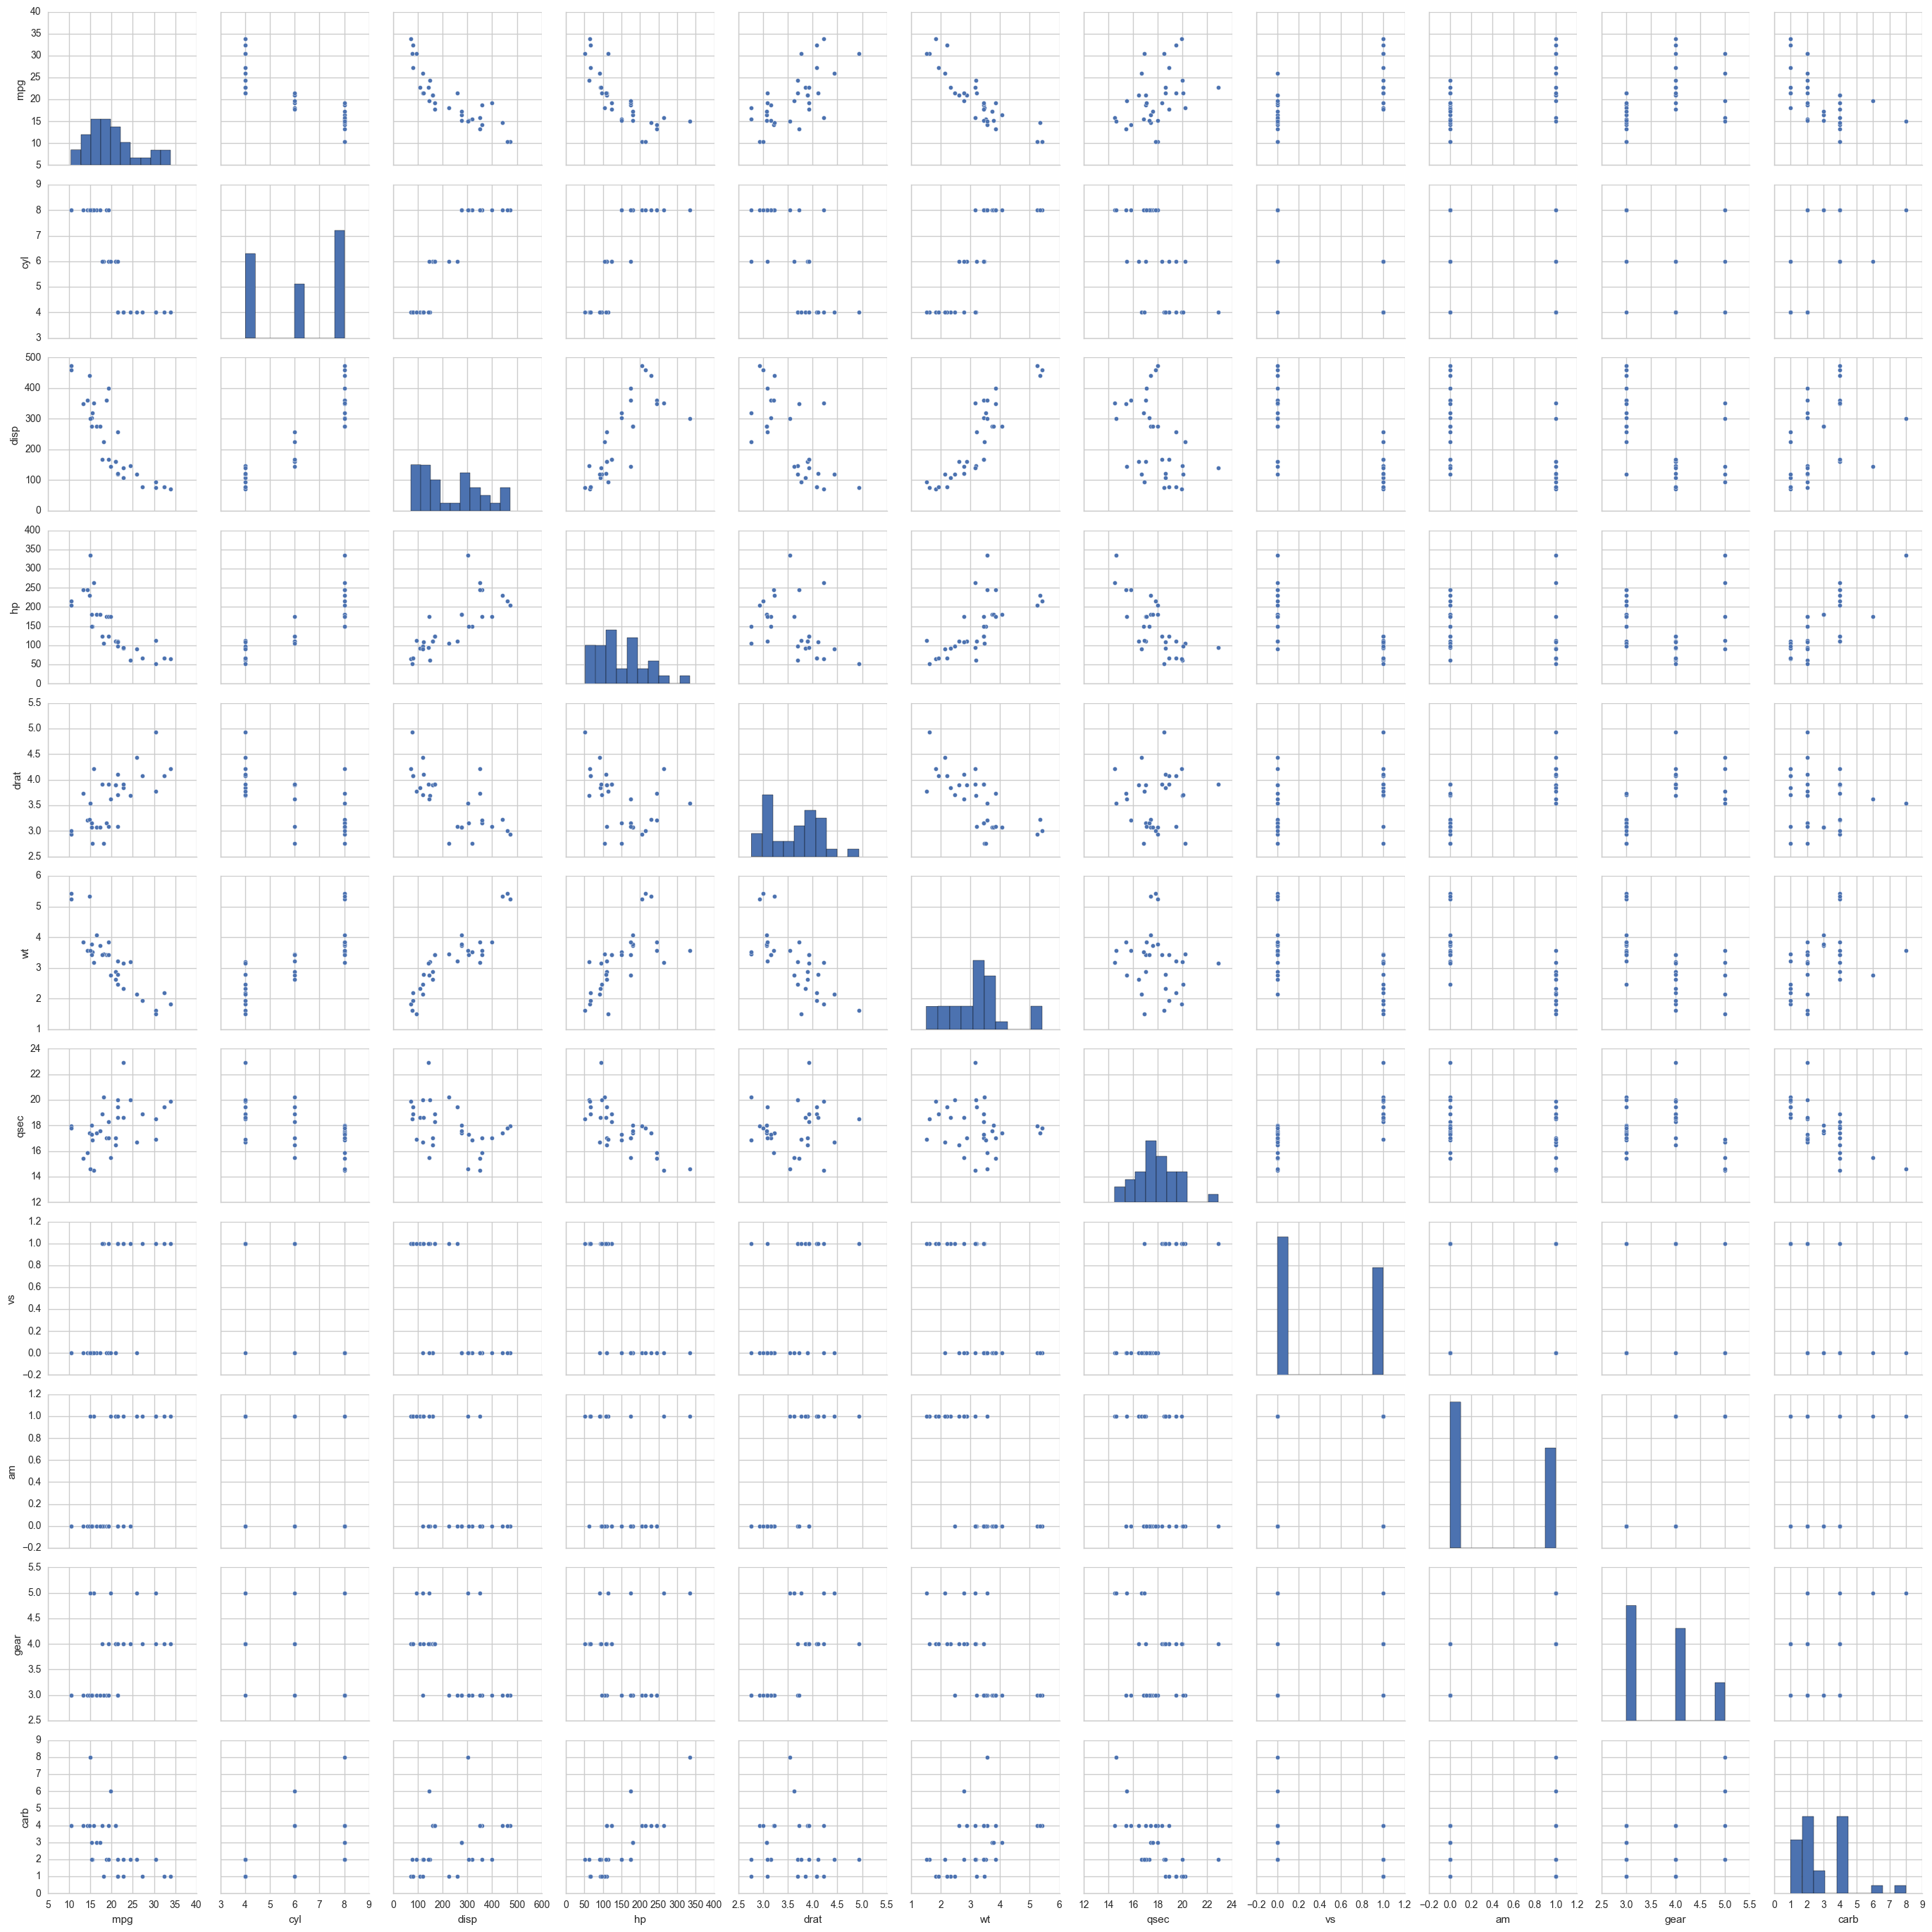

In [7]:
sb.pairplot(cars)

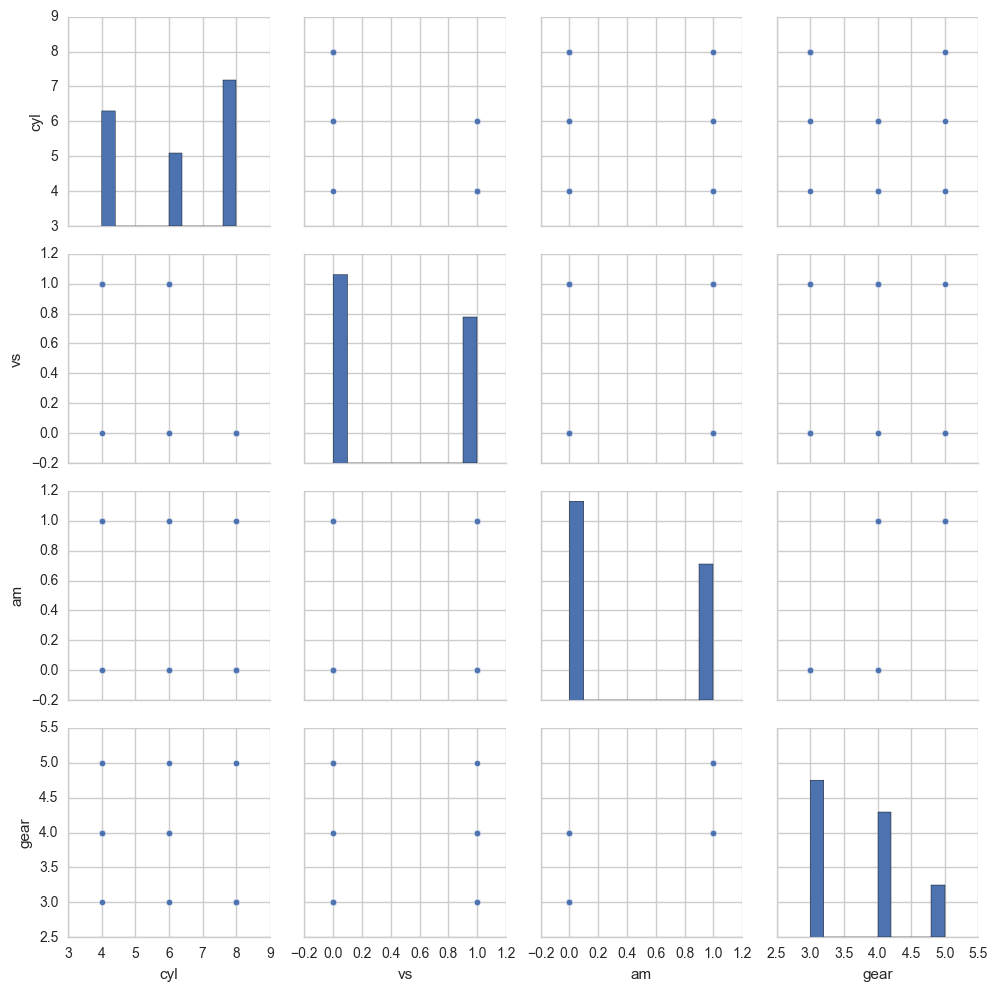

In [8]:
X = cars[['cyl', 'vs', 'am', 'gear']]
sb.pairplot(X)

In [9]:
cyl = cars['cyl']
vs = cars['vs']
am = cars['am']
gear = cars['gear']
spearmanr_coefficient, p_value = spearmanr(cyl, vs)
print 'Spearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient)

Spearman Rank Correlation Coefficient -0.814


In [10]:
spearmanr_coefficient, p_value = spearmanr(cyl, am)
print 'Spearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient)

Spearman Rank Correlation Coefficient -0.522


In [11]:
spearmanr_coefficient, p_value = spearmanr(cyl, gear)
print 'Spearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient)

Spearman Rank Correlation Coefficient -0.564


### Chi-square test for independence

In [14]:
table = pd.crosstab(cyl, am)

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print 'Chi-square Statistic %0.3f p_value %0.3f' % (chi2, p)

Chi-square Statistic 8.741 p_value 0.013


In [15]:
table = pd.crosstab(cars['cyl'], cars['vs'])
chi2, p, dof, expected = chi2_contingency(table.values)
print 'Chi-square Statistic %0.3f p_value %0.3f' % (chi2, p)

Chi-square Statistic 21.340 p_value 0.000


In [16]:
table = pd.crosstab(cars['cyl'], cars['gear'])
chi2, p, dof, expected = chi2_contingency(table.values)
print 'Chi-square Statistic %0.3f p_value %0.3f' % (chi2, p)

Chi-square Statistic 18.036 p_value 0.001


![title](Header__0007_3.png "Header")
___
# Chapter 3 - Basic Math and Statistics
## Segment 6 - Transforming dataset distributions

In [1]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

### Normalizing and transforming features with MinMaxScalar() and fit_transform()

In [3]:
address = 'C:/Users/Lillian Pierson/Desktop/Exercise Files/Ch03/03_06/mtcars.csv'
cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

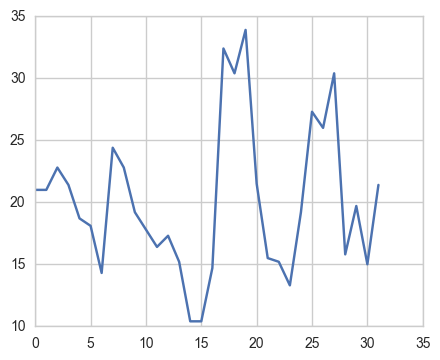

In [4]:
mpg = cars.mpg
plt.plot(mpg)

In [6]:
cars[['mpg']].describe()

mpg
count  32.000000
mean   20.090625
std     6.026948
min    10.400000
25%    15.425000
50%    19.200000
75%    22.800000
max    33.900000

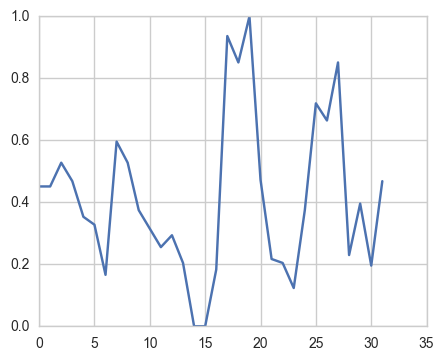

In [8]:
mpg_matrix = mpg.reshape(-1,1)
scaled = preprocessing.MinMaxScaler()
scaled_mpg = scaled.fit_transform(mpg_matrix)
plt.plot(scaled_mpg)

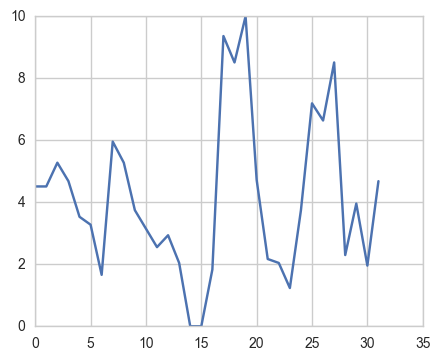

In [9]:
mpg_matrix = mpg.reshape(-1,1)
scaled = preprocessing.MinMaxScaler(feature_range=(0,10))
scaled_mpg = scaled.fit_transform(mpg_matrix)
plt.plot(scaled_mpg)

### Using scale() to scale your features

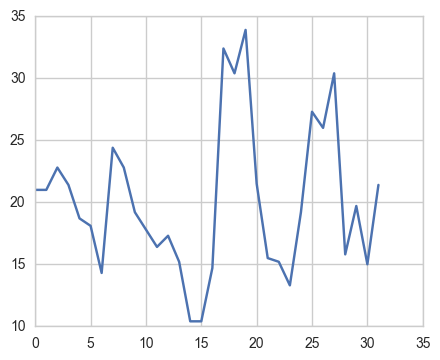

In [11]:
standardized_mpg = scale(mpg, axis=0, with_mean=False, with_std=False)
plt.plot(standardized_mpg)

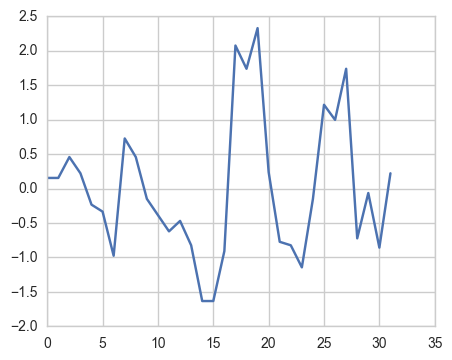

In [12]:
standardized_mpg = scale(mpg)
plt.plot(standardized_mpg)

![title](Header__0006_4.png "Header")
___
# Chapter 4 - Dimensionality Reduction

## Segment 2 - Explanatory factor analysis

In [1]:
import pandas as pd
import numpy as np

import sklearn
from sklearn.decomposition import FactorAnalysis

from sklearn import datasets

### Factor analysis on iris dataset

In [3]:
iris =  datasets.load_iris()

X = iris.data

variable_names = iris.feature_names

X[0:10,]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1]])

In [4]:
factor = FactorAnalysis().fit(X)

pd.DataFrame(factor.components_, columns=variable_names)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.707227         -0.153147           1.653151          0.701569
1           0.114676          0.159763          -0.045604         -0.014052
2          -0.000000          0.000000           0.000000          0.000000
3          -0.000000          0.000000           0.000000         -0.000000

![title](Header__0006_4.png "Header")
___
# Chapter 4 - Dimensionality Reduction
## Segment 3 - Principal component analysis (PCA)

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import pylab as plt
import seaborn as sb
from IPython.display import Image
from IPython.core.display import HTML 
from pylab import rcParams

import sklearn
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import datasets

In [11]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

### PCA on the iris dataset

In [3]:
iris = datasets.load_iris()
X = iris.data
variable_names = iris.feature_names
X[0:10,]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1]])

In [4]:
pca = decomposition.PCA()
iris_pca = pca.fit_transform(X)

pca.explained_variance_ratio_

array([ 0.92461621,  0.05301557,  0.01718514,  0.00518309])

In [5]:
pca.explained_variance_ratio_.sum()

1.0

In [6]:
comps = pd.DataFrame(pca.components_, columns=variable_names)
comps

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.361590         -0.082269           0.856572          0.358844
1          -0.656540         -0.729712           0.175767          0.074706
2           0.580997         -0.596418          -0.072524         -0.549061
3           0.317255         -0.324094          -0.479719          0.751121

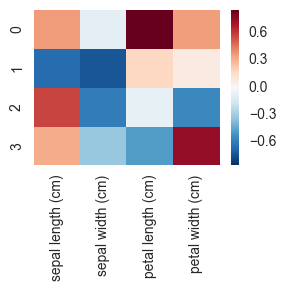

In [12]:
sb.heatmap(comps)

![title](Header__0005_5.png "Header")
___
# Chapter 5 - Outlier Analysis
## Segment 1 - Extreme value analysis using univariate methods

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams

In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4

In [5]:
df = pd.read_csv(
    filepath_or_buffer='C:/Users/Lillian Pierson/Desktop/Exercise Files/Ch05/05_01/iris.data.csv',
    header=None,
    sep=',')
df.columns=['Sepal Length','Sepal Width','Petal Length','Petal Width', 'Species']
X = df.ix[:,0:4].values
y = df.ix[:,4].values

df[:5]

Sepal Length  Sepal Width  Petal Length  Petal Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

### Identifying outliers from Tukey boxplots

[]

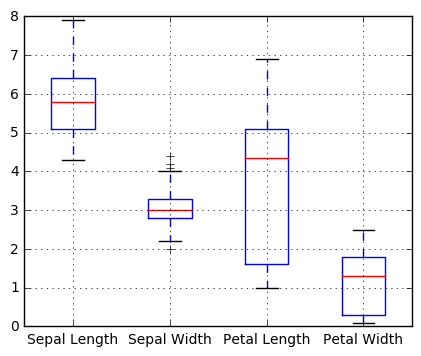

In [6]:
df.boxplot(return_type='dict')
plt.plot()

In [7]:
Sepal_Width = X[:,1]
iris_outliers = (Sepal_Width > 4)
df[iris_outliers]

Sepal Length  Sepal Width  Petal Length  Petal Width Species
15           5.7          4.4           1.5          0.4  setosa
32           5.2          4.1           1.5          0.1  setosa
33           5.5          4.2           1.4          0.2  setosa

In [8]:
Sepal_Width = X[:,1]
iris_outliers = (Sepal_Width < 2.05)
df[iris_outliers]

Sepal Length  Sepal Width  Petal Length  Petal Width     Species
60           5.0          2.0           3.5          1.0  versicolor

### Applying Tukey outlier labeling

In [9]:
pd.options.display.float_format = '{:.1f}'.format
X_df = pd.DataFrame(X)
print X_df.describe()

          0     1     2     3
count 150.0 150.0 150.0 150.0
mean    5.8   3.1   3.8   1.2
std     0.8   0.4   1.8   0.8
min     4.3   2.0   1.0   0.1
25%     5.1   2.8   1.6   0.3
50%     5.8   3.0   4.3   1.3
75%     6.4   3.3   5.1   1.8
max     7.9   4.4   6.9   2.5


![title](Header__0005_5.png "Header")
___
# Chapter 5 - Outlier Analysis
## Segment 2 - Multivariate analysis for outlier detection

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

### Visually inspecting boxplots

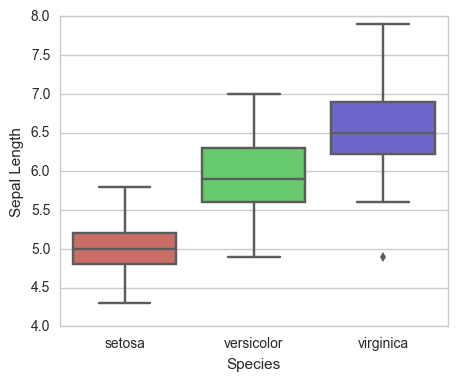

In [3]:
df = pd.read_csv(
    filepath_or_buffer='C:/Users/Lillian Pierson/Desktop/Exercise Files/Ch05/05_02/iris.data.csv',
    header=None,
    sep=',')

df.columns=['Sepal Length','Sepal Width','Petal Length','Petal Width', 'Species']
data = df.ix[:,0:4].values
target = df.ix[:,4].values
df[:5]

sb.boxplot(x='Species', y='Sepal Length', data=df, palette='hls')

### Looking at the scatterplot matrix

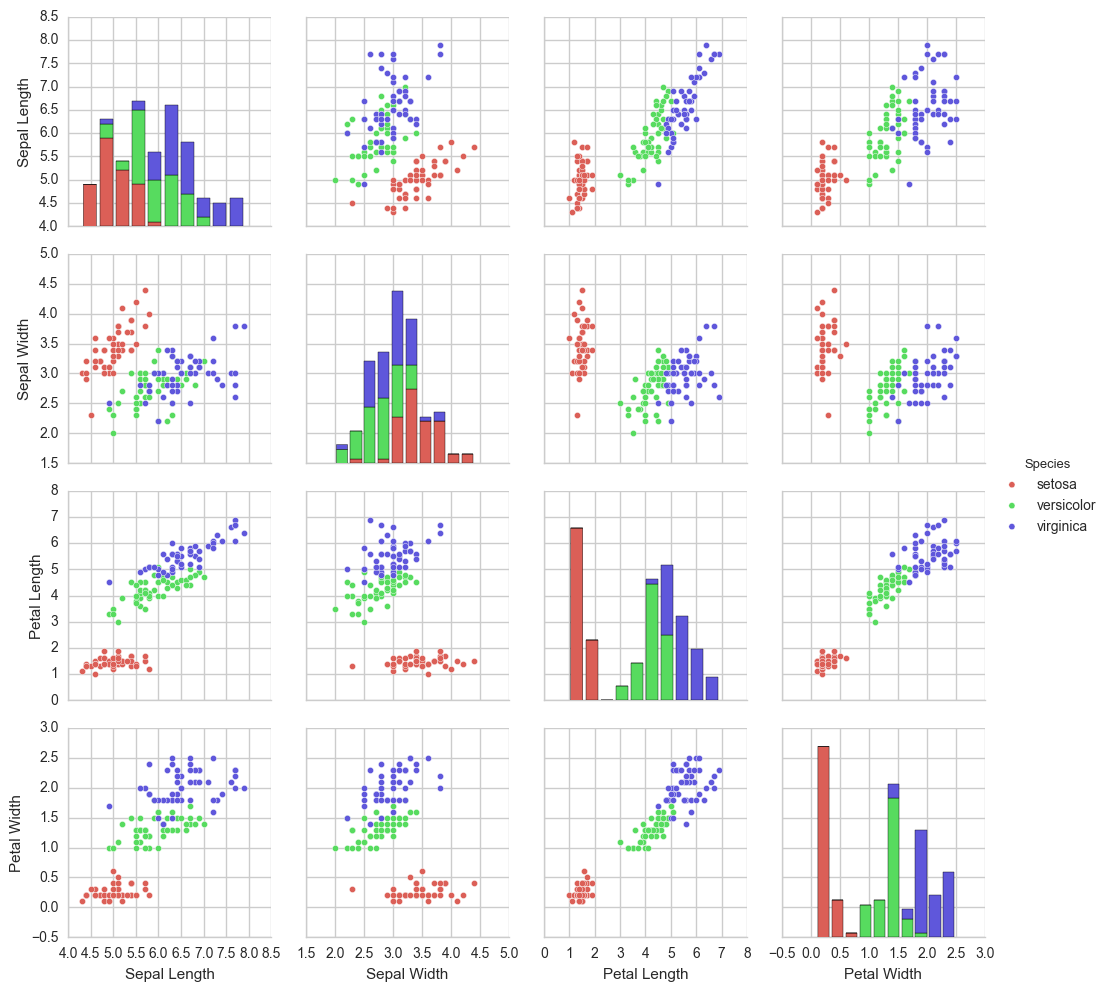

In [4]:
sb.pairplot(df, hue='Species', palette='hls')

![title](Header__0005_5.png "Header")
___
# Chapter 5 - Outlier Analysis
## Segment 3 - DBSCan clustering to identify outliers

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter


In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

### DBSCan clustering to identify outliers
#### Train your model and identify outliers

In [5]:
df = pd.read_csv(
    filepath_or_buffer='C:/Users/Lillian Pierson/Desktop/Exercise Files/Ch05/05_03/iris.data.csv',
    header=None,
    sep=',')

df.columns=['Sepal Length','Sepal Width','Petal Length','Petal Width', 'Species']
data = df.ix[:,0:4].values
target = df.ix[:,4].values
df[:5]

Sepal Length  Sepal Width  Petal Length  Petal Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [8]:
model = DBSCAN(eps=0.8, min_samples=19).fit(data)
print model

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
    min_samples=19, p=None, random_state=None)


#### Visualize your results

In [9]:
outliers_df = pd.DataFrame(data)

print Counter(model.labels_)

print outliers_df[model.labels_ ==-1]

Counter({1: 94, 0: 50, -1: 6})
       0    1    2    3
98   5.1  2.5  3.0  1.1
105  7.6  3.0  6.6  2.1
117  7.7  3.8  6.7  2.2
118  7.7  2.6  6.9  2.3
122  7.7  2.8  6.7  2.0
131  7.9  3.8  6.4  2.0


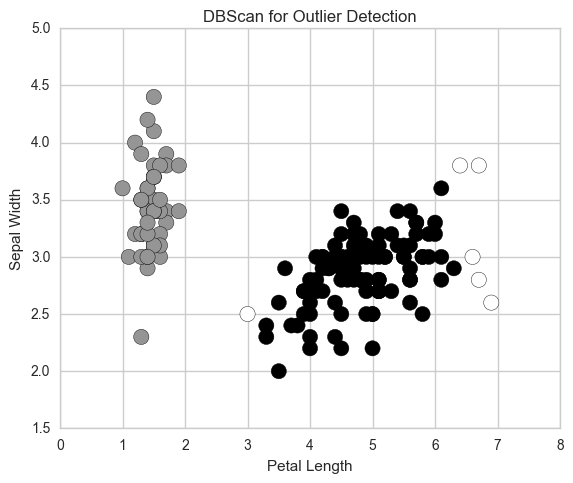

In [10]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1]) 

colors = model.labels_

ax.scatter(data[:,2], data[:,1], c=colors, s=120)
ax.set_xlabel('Petal Length')
ax.set_ylabel('Sepal Width')
plt.title('DBScan for Outlier Detection')

![title](Header__0004_6.png "Header")
___
# Chapter 6 - Cluster Analysis
## Segment 1 - K-means method
### Setting up for clustering analysis

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
%matplotlib inline
plt.figure(figsize=(7,4))

In [4]:
iris = datasets.load_iris()

X = scale(iris.data)
y = pd.DataFrame(iris.target)
variable_names = iris.feature_names
X[0:10,]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673],
       [-0.53717756,  1.95766909, -1.17067529, -1.05003079],
       [-1.50652052,  0.80065426, -1.3412724 , -1.18150376],
       [-1.02184904,  0.80065426, -1.2844067 , -1.31297673],
       [-1.74885626, -0.35636057, -1.3412724 , -1.31297673],
       [-1.14301691,  0.10644536, -1.2844067 , -1.4444497 ]])

## Building and running your model

In [5]:
clustering = KMeans(n_clusters=3, random_state=5)

clustering.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=5, tol=0.0001,
    verbose=0)

## Plotting your model outputs

In [7]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
y.columns = ['Targets']

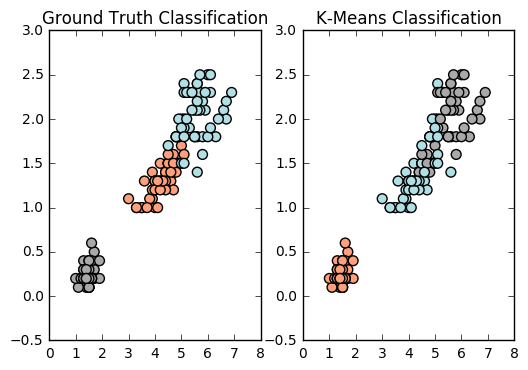

In [8]:
color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])

plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width, c=color_theme[clustering.labels_], s=50)
plt.title('K-Means Classification')

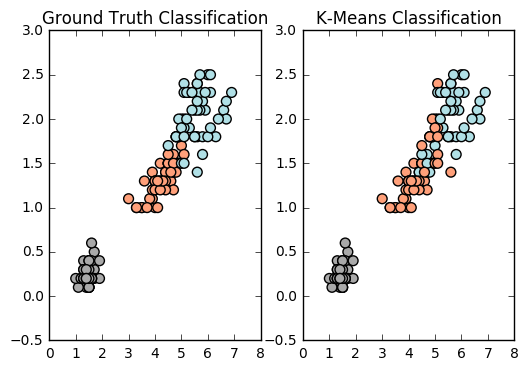

In [9]:
relabel = np.choose(clustering.labels_, [2, 0, 1]).astype(np.int64)
plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width, c=color_theme[relabel], s=50)
plt.title('K-Means Classification')

## Evaluate your clustering results

In [10]:
print(classification_report(y, relabel))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.74      0.78      0.76        50
          2       0.77      0.72      0.74        50

avg / total       0.83      0.83      0.83       150



![title](Header__0004_6.png "Header")
___
# Chapter 6 - Cluster Analysis
## Segment 2 - Hierarchial methods
#### Setting up for clustering analysis

In [1]:
import numpy as np
import pandas as pd

import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

In [2]:
np.set_printoptions(precision=4, suppress=True)
plt.figure(figsize=(10, 3))
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [4]:
address = 'C:/Users/Lillian Pierson/Desktop/Exercise Files/Ch06/06_02/mtcars.csv'
cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

X = cars.ix[:,(1,3,4,6)].values

y = cars.ix[:,(9)].values

### Using scipy to generate dendrograms

In [7]:
Z = linkage(X, 'ward')

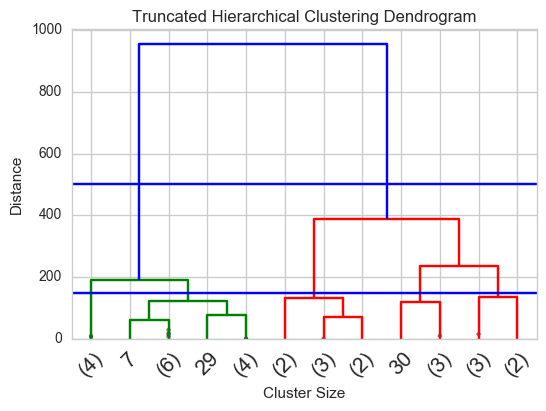

In [8]:
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15., show_contracted=True)

plt.title('Truncated Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.axhline(y=500)
plt.axhline(y=150)
plt.show()

### Generating hierarchical clusters

In [13]:
k=2

Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.78125

In [14]:
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.4375

In [15]:
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.78125

In [16]:
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='manhattan', linkage='average')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.71875

![title](Header__0004_6.png "Header")
___
# Chapter 6 - Cluster Analysis
## Segment 3 - Instance-based learning w/ k-Nearest Neighbor
#### Setting up for classification analysis

In [2]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
from pylab import rcParams

import urllib

import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn import metrics

In [3]:
np.set_printoptions(precision=4, suppress=True) 
%matplotlib inline
rcParams['figure.figsize'] = 7, 4
plt.style.use('seaborn-whitegrid')

## Splitting your data into test and training datasets

In [4]:
address = 'C:/Users/Lillian Pierson/Desktop/Exercise Files/Ch06/06_03/mtcars.csv'
cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

X_prime = cars.ix[:,(1,3,4,6)].values

y = cars.ix[:,9].values

In [5]:
X = preprocessing.scale(X_prime)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=17)

## Building and training your model with training data

In [9]:
clf = neighbors.KNeighborsClassifier()

clf.fit(X_train, y_train)
print(clf)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


## Evaluating your model's predictions against the test dataset

In [13]:
y_expect = y_test
y_pred = clf.predict(X_test)

print(metrics.classification_report(y_expect, y_pred))

             precision    recall  f1-score   support

          0       0.71      1.00      0.83         5
          1       1.00      0.67      0.80         6

avg / total       0.87      0.82      0.82        11



![title](Header__0003_7.png "Header")
___
## Chapter 7 - Network Analysis with NetworkX
##  Segment 2 - Working with graph objects

In [1]:
! pip install networkx

You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import networkx as nx

In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

### Creating graph objects

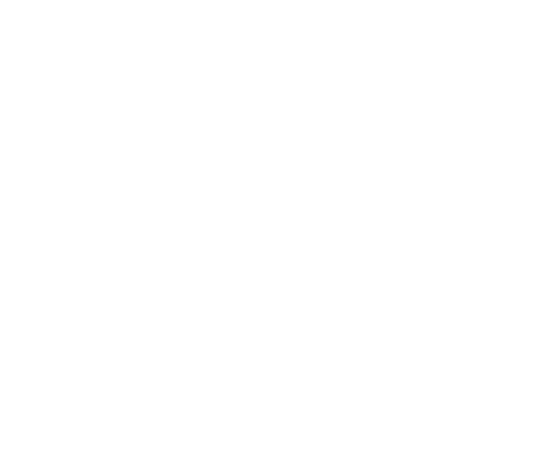

In [4]:
G = nx.Graph()
nx.draw(G)

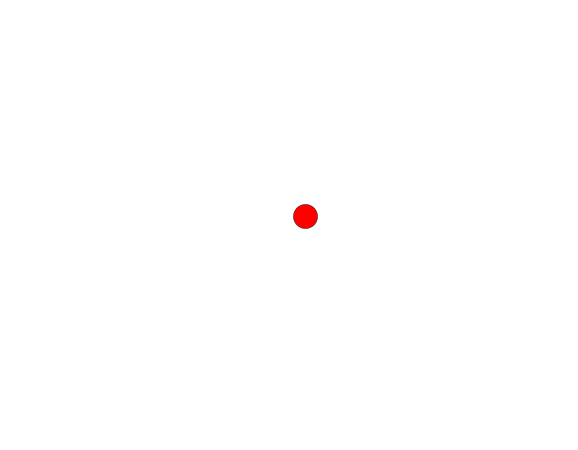

In [5]:
G.add_node(1)
nx.draw(G)

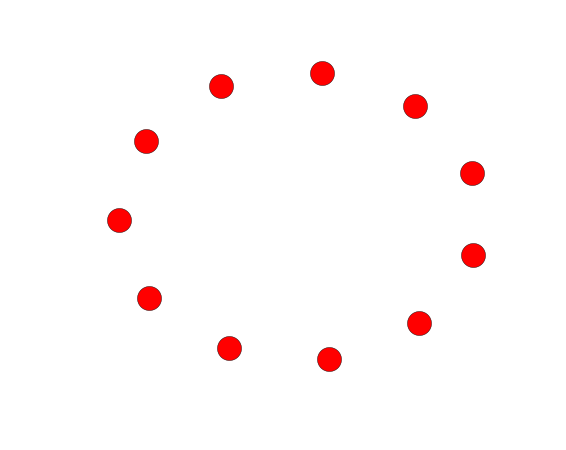

In [6]:
G.add_nodes_from([2,3,4,5,6,8,9,12,15,16])
nx.draw(G)

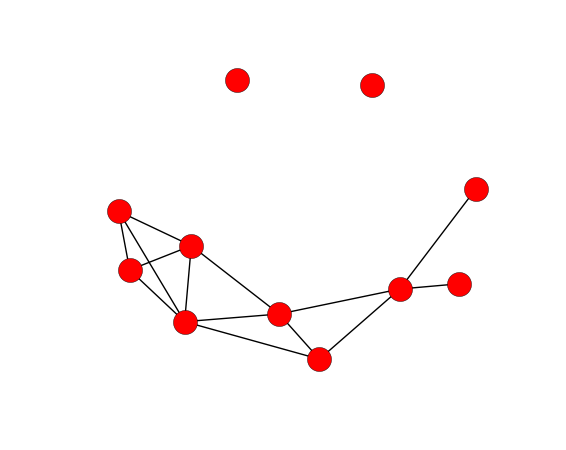

In [7]:
G.add_edges_from([(2,4),(2,6),(2,8),(2,12),(2,16),(3,6),(3,9), (3,12),(3,15),(4,8),(4,12),(4,16),(6,12),(8,16)])
nx.draw(G)

### The basics about drawing graph objects

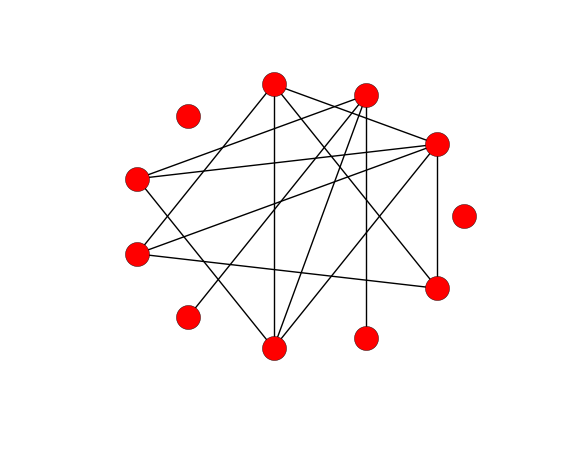

In [8]:
nx.draw_circular(G)

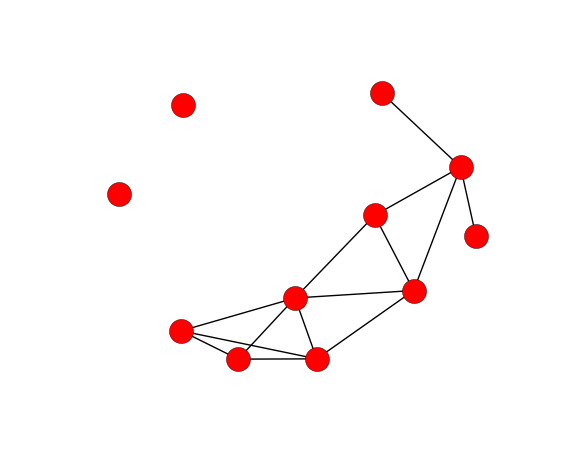

In [9]:
nx.draw_spring(G)

### Labeling and coloring your graph plots

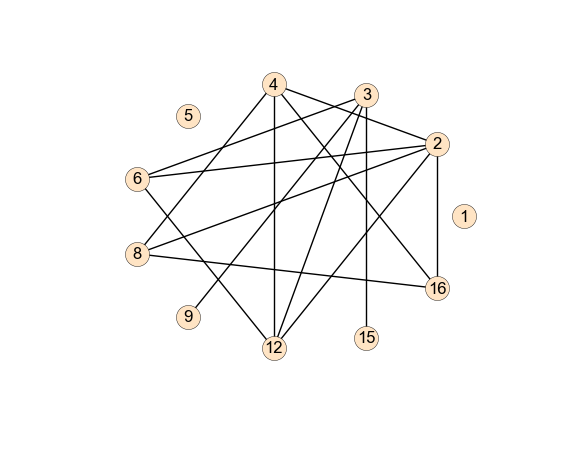

In [10]:
nx.draw_circular(G, node_color='bisque', with_labels=True)

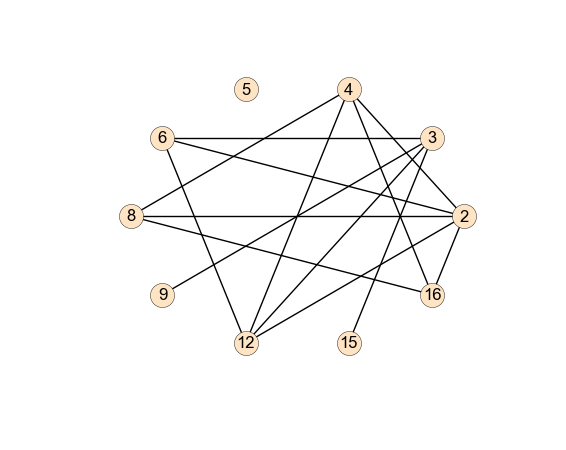

In [11]:
G.remove_node(1)
nx.draw_circular(G, node_color='bisque', with_labels=True)

### Identifying graph properties

In [12]:
sum_stats = nx.info(G)
print sum_stats

Name: 
Type: Graph
Number of nodes: 10
Number of edges: 14
Average degree:   2.8000


In [13]:
print nx.degree(G)

{2: 5, 3: 4, 4: 4, 5: 0, 6: 3, 8: 3, 9: 1, 12: 4, 15: 1, 16: 3}


### Using graph generators

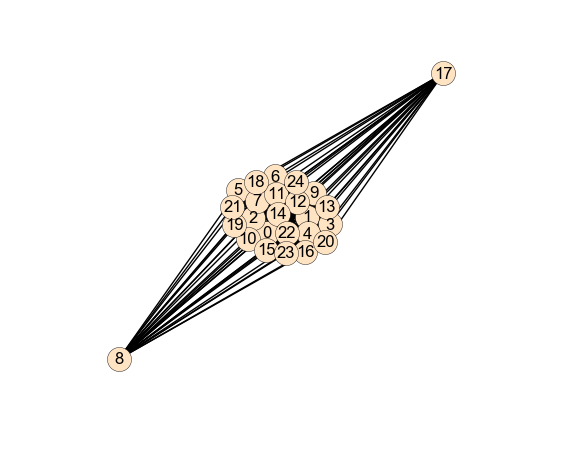

In [14]:
G = nx.complete_graph(25)
nx.draw(G, node_color='bisque', with_labels=True)

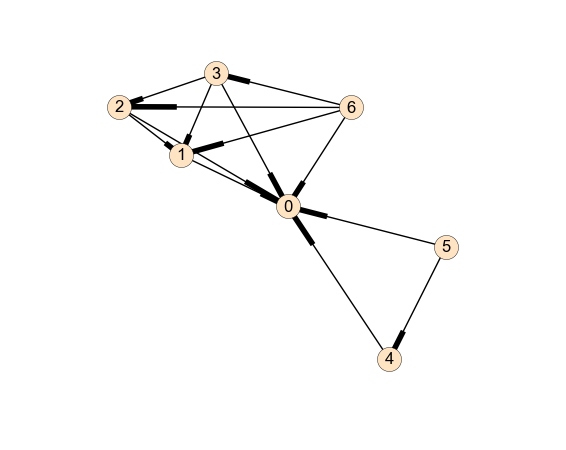

In [15]:
G = nx.gnc_graph(7, seed=25)
nx.draw(G, node_color='bisque', with_labels=True)

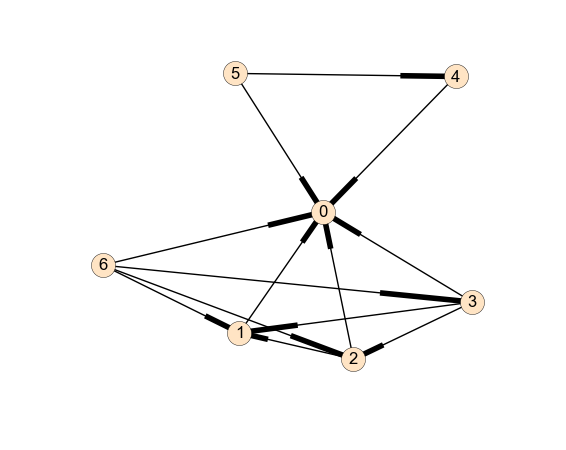

In [16]:
ego_G = nx.ego_graph(G, 3, radius=5)
nx.draw(G, node_color='bisque', with_labels=True)

![title](Header__0003_7.png "Header")
___
## Chapter 7 - Network Analysis with NetworkX
## Segment 3 - Simulating a social network (ie; directed network analysis)

In [1]:
import numpy as np
import pandas as pd

import networkx as nx

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

### Generating a graph object and edgelist

In [3]:
DG = nx.gn_graph(7, seed=25)

for line in nx.generate_edgelist(DG, data=False): print(line)

1 0
2 0
3 2
4 3
5 0
6 4


### Assigning attributes to nodes

In [4]:
print DG.node[0]

{}


In [5]:
DG.node[0]['name'] = 'Alice'

In [6]:
print DG.node[0]

{'name': 'Alice'}


In [7]:
DG.node[1]['name'] = 'Bob'
DG.node[2]['name'] = 'Claire'
DG.node[3]['name'] = 'Dennis'
DG.node[4]['name'] = 'Esther'
DG.node[5]['name'] = 'Frank'
DG.node[6]['name'] = 'George'

In [10]:
DG.add_nodes_from([(0,{'age':25}),(1,{'age':31}),(2,{'age':18}),(3,{'age':47}),(4,{'age':22}),
                   (5,{'age':23}),(6,{'age':50})])
print DG.node[0]

{'age': 25, 'name': 'Alice'}


In [11]:
DG.node[0]['gender'] = 'f'
DG.node[1]['gender'] = 'm'
DG.node[2]['gender'] = 'f'
DG.node[3]['gender'] = 'm'
DG.node[4]['gender'] = 'f'
DG.node[5]['gender'] = 'm'
DG.node[6]['gender'] = 'm'


### Visualize your network graph

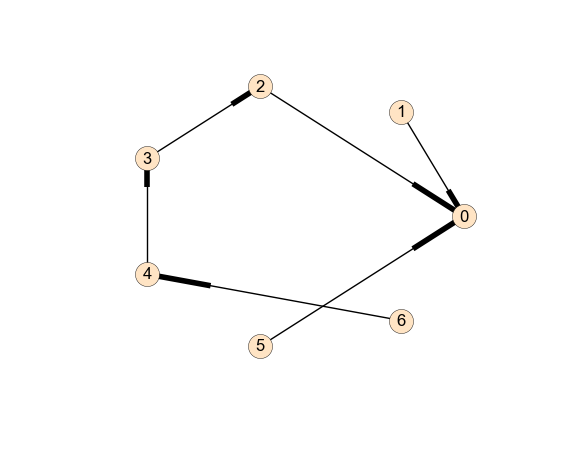

In [13]:
nx.draw_circular(DG, node_color='bisque', with_labels=True)

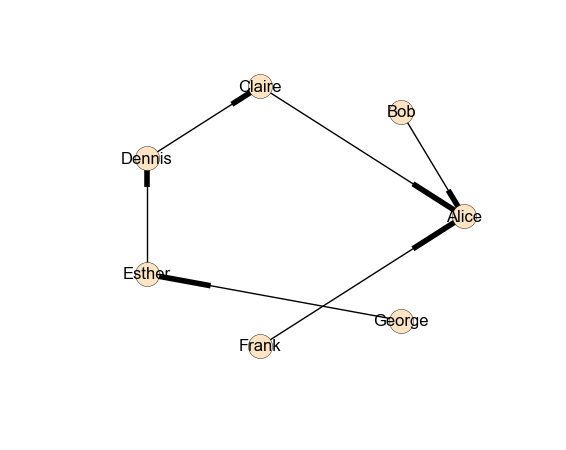

In [14]:
labeldict = {0: 'Alice',1:'Bob',2:'Claire',3:'Dennis',4:'Esther',5:'Frank',6:'George'}

nx.draw_circular(DG, labels=labeldict, node_color='bisque', with_labels=True)

In [15]:
G = DG.to_undirected()

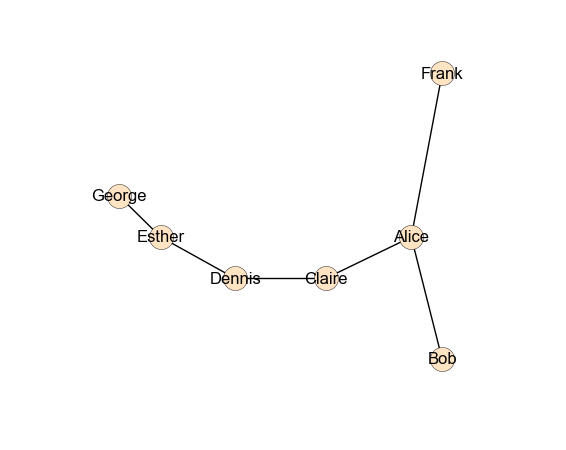

In [16]:
nx.draw_spectral(G, labels=labeldict, node_color='bisque', with_labels=True)

![title](Header__0003_7.png "Header")
___
## Chapter 7 - Network Analysis with NetworkX
## Segment 4 - Analyzing a social network

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import networkx as nx

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

In [3]:
DG = nx.gn_graph(7, seed = 25)

for line in nx.generate_edgelist(DG, data=False):
    print(line)

DG.node[0]['name'] = 'Alice'
DG.node[1]['name'] = 'Bob'
DG.node[2]['name'] = 'Claire'
DG.node[3]['name'] = 'Dennis'
DG.node[4]['name'] = 'Esther'
DG.node[5]['name'] = 'Frank'
DG.node[6]['name'] = 'George'

1 0
2 0
3 2
4 3
5 0
6 4


In [4]:
G = DG.to_undirected()

In [5]:
print nx.info(DG)

Name: gn_graph(7)
Type: DiGraph
Number of nodes: 7
Number of edges: 6
Average in degree:   0.8571
Average out degree:   0.8571


#### Considering degrees in a social network

In [6]:
DG.degree()

{0: 3, 1: 1, 2: 2, 3: 2, 4: 2, 5: 1, 6: 1}

#### Identifying successor nodes

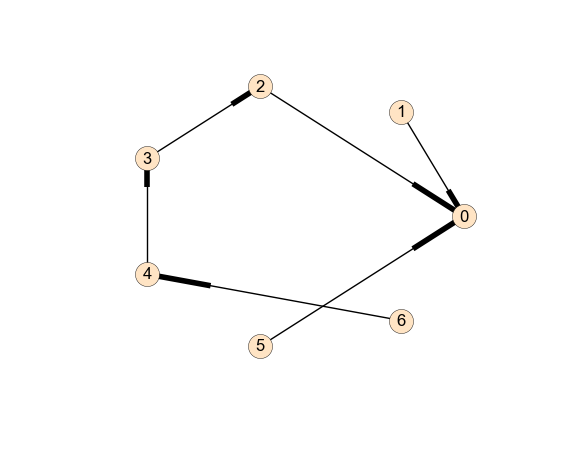

In [7]:
nx.draw_circular(DG, node_color='bisque', with_labels=True)

In [8]:
DG.successors(3)

[2]

In [9]:
DG.neighbors(4)

[3]

In [10]:
G.neighbors(4)

[3, 6]

![title](Header__0002_8.png)
___
# Chapter 8 - Basic Algorithmic Learning
## Segment 1 - Linear Regression

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from collections import Counter

In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

#### (Multiple) linear regression on the enrollment data

In [8]:
address = 'C:/Users/Lillian Pierson/Desktop/Exercise Files/Ch08/08_01/enrollment_forecast.csv'
enroll = pd.read_csv(address)
enroll.columns = ['year','roll','unem', 'hgrad', 'inc']
enroll.head()

year  roll  unem  hgrad   inc
0     1  5501   8.1   9552  1923
1     2  5945   7.0   9680  1961
2     3  6629   7.3   9731  1979
3     4  7556   7.5  11666  2030
4     5  8716   7.0  14675  2112

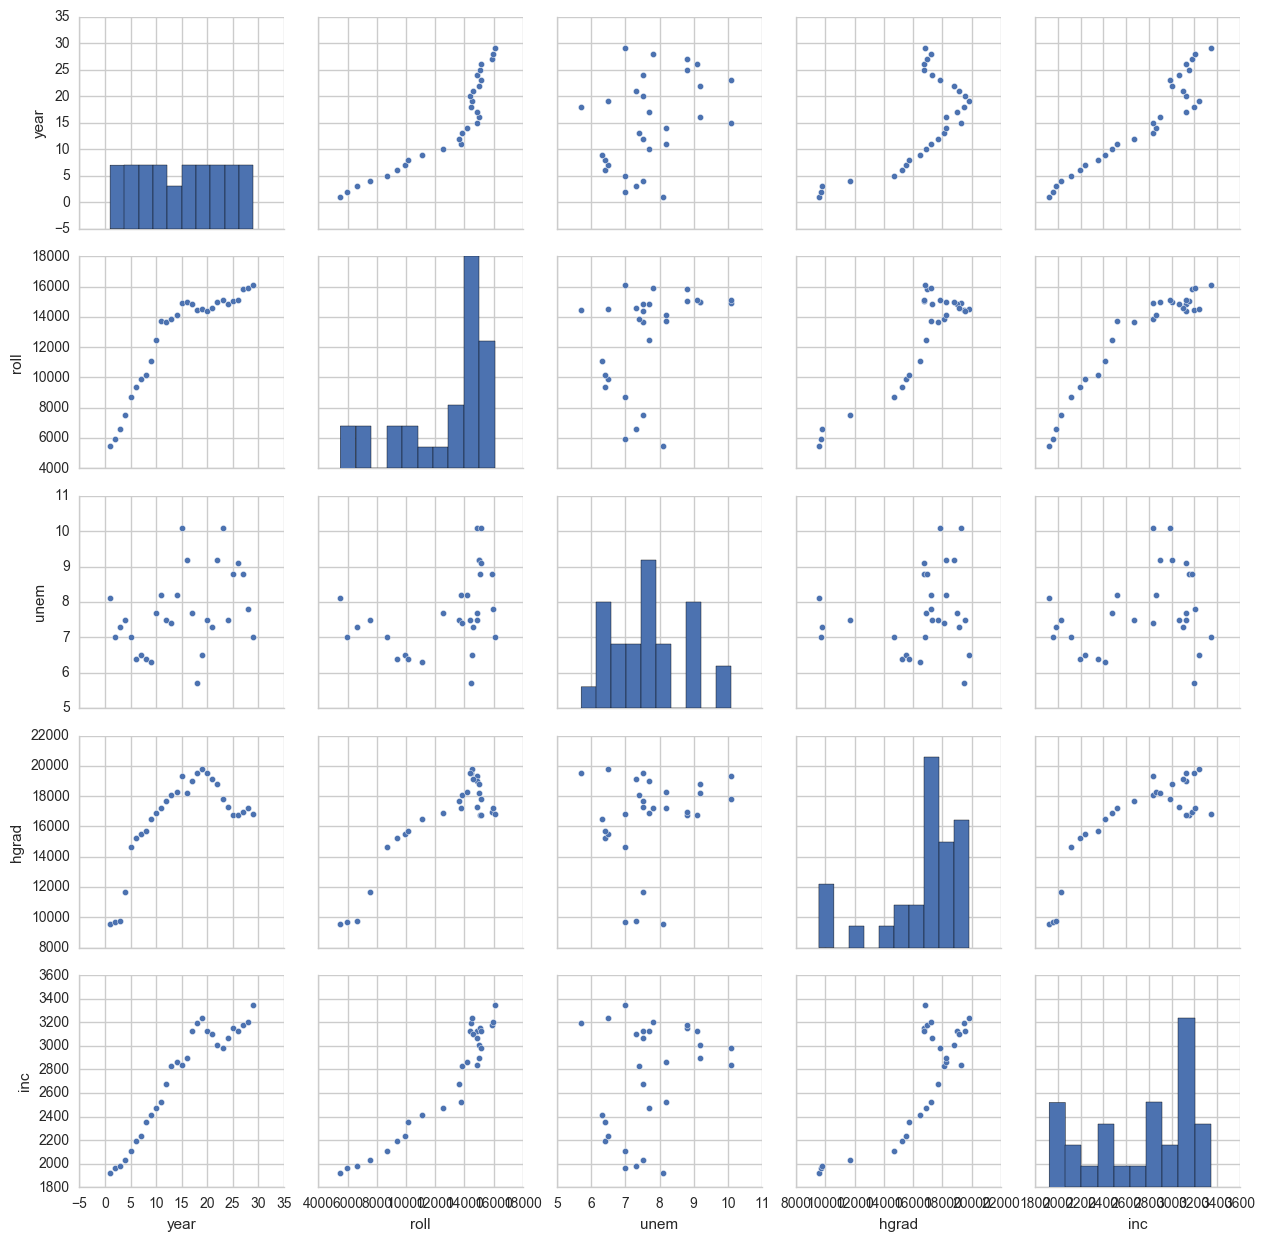

In [9]:
sb.pairplot(enroll)

In [10]:
print enroll.corr()

           year      roll      unem     hgrad       inc
year   1.000000  0.900934  0.378305  0.670300  0.944287
roll   0.900934  1.000000  0.391344  0.890294  0.949876
unem   0.378305  0.391344  1.000000  0.177376  0.282310
hgrad  0.670300  0.890294  0.177376  1.000000  0.820089
inc    0.944287  0.949876  0.282310  0.820089  1.000000


In [12]:
enroll_data = enroll.ix[:,(2,3)].values
enroll_target = enroll.ix[:,1].values
enroll_data_names = ['unem', 'hgrad']

X, y = scale(enroll_data), enroll_target

### Checking for missing values

In [13]:
missing_values = X==np.NAN
X[missing_values == True]

array([], dtype=float64)

In [14]:
LinReg = LinearRegression(normalize=True)

LinReg.fit(X,y)

print LinReg.score(X,y)

0.848881266613


![title](Header__0002_8.png)
___
# Chapter 8 - Basic Algorithmic Learning
## Segment 2 - Logistic Regression

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import scipy
from scipy.stats import spearmanr

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.preprocessing import scale 
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn import preprocessing

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

### Logistic regression on mtcars

In [3]:
address = 'C:/Users/Lillian Pierson/Desktop/Exercise Files/Ch08/08_02/mtcars.csv'
cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
cars.head()

car_names   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2

In [4]:
cars_data = cars.ix[:,(5,11)].values
cars_data_names = ['drat','carb']

y = cars.ix[:,9].values

#### Checking for independence between features

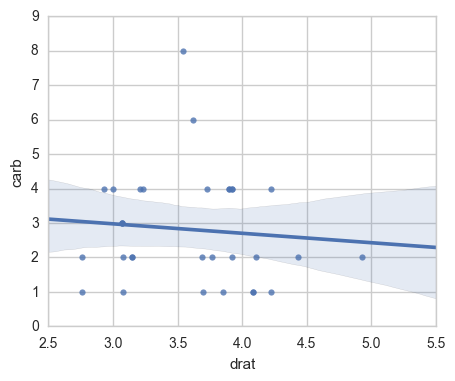

In [5]:
sb.regplot(x='drat', y='carb', data=cars, scatter=True)

In [6]:
drat = cars['drat']
carb = cars['carb']

spearmanr_coefficient, p_value =  spearmanr(drat, carb)
print 'Spearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient)

Spearman Rank Correlation Coefficient -0.125


#### Checking for missing values

In [7]:
cars.isnull().sum()

car_names    0
mpg          0
cyl          0
disp         0
hp           0
drat         0
wt           0
qsec         0
vs           0
am           0
gear         0
carb         0
dtype: int64

#### Checking that your target is binary or ordinal

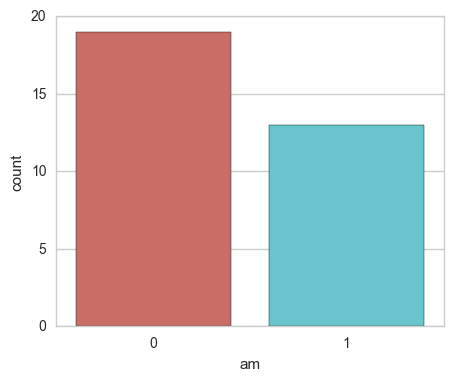

In [8]:
sb.countplot(x='am', data=cars, palette='hls')

#### Checking that your dataset size is sufficient

In [9]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
car_names    32 non-null object
mpg          32 non-null float64
cyl          32 non-null int64
disp         32 non-null float64
hp           32 non-null int64
drat         32 non-null float64
wt           32 non-null float64
qsec         32 non-null float64
vs           32 non-null int64
am           32 non-null int64
gear         32 non-null int64
carb         32 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


#### Deploying and evaluating your model

In [10]:
X = scale(cars_data)

In [11]:
LogReg = LogisticRegression()

LogReg.fit(X,y)
print LogReg.score(X,y)

0.8125


In [12]:
y_pred = LogReg.predict(X)
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.79      0.83        19
          1       0.73      0.85      0.79        13

avg / total       0.82      0.81      0.81        32



![title](Header__0002_8.png)
___
# Chapter 8 - Basic Algorithmic Learning
## Segment 3 - Naive Bayes Classifiers

In [1]:
import numpy as np
import pandas as pd

import urllib

import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

## Naive Bayes
### Using Naive Bayes to predict spam

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
raw_data = urllib.urlopen(url)
dataset = np.loadtxt(raw_data, delimiter=",")
print dataset[0]

[   0.       0.64     0.64     0.       0.32     0.       0.       0.       0.
    0.       0.       0.64     0.       0.       0.       0.32     0.
    1.29     1.93     0.       0.96     0.       0.       0.       0.       0.
    0.       0.       0.       0.       0.       0.       0.       0.       0.
    0.       0.       0.       0.       0.       0.       0.       0.       0.
    0.       0.       0.       0.       0.       0.       0.       0.778
    0.       0.       3.756   61.     278.       1.   ]


In [3]:
X = dataset[:,0:48]

y = dataset[:, -1]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=17)

In [10]:
BernNB = BernoulliNB(binarize=True)
BernNB.fit(X_train, y_train)
print(BernNB)

y_expect = y_test
y_pred = BernNB.predict(X_test)
print accuracy_score(y_expect, y_pred)

BernoulliNB(alpha=1.0, binarize=True, class_prior=None, fit_prior=True)
0.855826201448


In [11]:
MultiNB = MultinomialNB()

MultiNB.fit(X_train, y_train)
print(MultiNB)

y_pred = MultiNB.predict(X_test)
print accuracy_score(y_expect, y_pred)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
0.873601053325


In [12]:
GausNB = GaussianNB()
GausNB.fit(X_train, y_train)
print(GausNB)

y_pred = GausNB.predict(X_test)
print accuracy_score(y_expect, y_pred)

GaussianNB()
0.813034891376


In [13]:
BernNB = BernoulliNB(binarize=0.1)
BernNB.fit(X_train, y_train)
print(BernNB)

y_expect = y_test
y_pred = BernNB.predict(X_test)
print accuracy_score(y_expect, y_pred)

BernoulliNB(alpha=1.0, binarize=0.1, class_prior=None, fit_prior=True)
0.895325872284


![title](Header__0001_9.png)
___
# Chapter 9 - Web-based Data Visualizations with Plotly
## Segment 1 - Basic charts
### Setting up to use Plotly within Jupyter

In [1]:
! pip install Plotly

You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
! pip install cufflinks

You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
import numpy as np
import pandas as pd

import cufflinks as cf

import plotly.plotly as py
import plotly.tools as tls
import plotly.graph_objs as go

In [4]:
tls.set_credentials_file(username='bigdatagal', api_key='hvginfgvwe')

### Creating line charts

#### A very basic line chart

In [5]:
a = np.linspace(start=0, stop=36, num=36)

np.random.seed(25)
b = np.random.uniform(low=0.0, high=1.0, size=36)

trace = go.Scatter(x=a, y=b)

data = [trace]

py.iplot(data, filename='basic-line-chart')

#### A line chart with more than one variable plotted

In [6]:
x = [1,2,3,4,5,6,7,8,9]
y = [1,2,3,4,0,4,3,2,1]
z = [10,9,8,7,6,5,4,3,2,1]

trace0 = go.Scatter(x=x, y=y, name='List Object', line = dict(width=5))
trace1 = go.Scatter(x=x, y=z, name='List Object 2', line = dict(width=10,))

data = [trace0, trace1]

layout = dict(title='Double Line Chart', xaxis= dict(title='x-axis'), yaxis= dict(title='y-axis'))
print layout

{'yaxis': {'title': 'y-axis'}, 'xaxis': {'title': 'x-axis'}, 'title': 'Double Line Chart'}


In [7]:
fig = dict(data=data, layout=layout)
print fig

{'layout': {'yaxis': {'title': 'y-axis'}, 'xaxis': {'title': 'x-axis'}, 'title': 'Double Line Chart'}, 'data': [{'y': [1, 2, 3, 4, 0, 4, 3, 2, 1], 'x': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'line': {'width': 5}, 'type': 'scatter', 'name': 'List Object'}, {'y': [10, 9, 8, 7, 6, 5, 4, 3, 2, 1], 'x': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'line': {'width': 10}, 'type': 'scatter', 'name': 'List Object 2'}]}


In [8]:
py.iplot(fig, filename='styled-line-chart')

#### A line chart from a pandas dataframe 

In [9]:
address = 'C:/Users/Lillian Pierson/Desktop/Exercise Files/Ch09/09_01/mtcars.csv'
cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

df = cars[['cyl', 'wt','mpg']]

layout = dict(title = 'Chart From Pandas DataFrame', xaxis= dict(title='x-axis'), yaxis= dict(title='y-axis'))

df.iplot(filename='cf-simple-line-chart', layout=layout)

### Creating bar charts

In [17]:
data = [go.Bar(x=[1,2,3,4,5,6,7,8,9,10],y=[1,2,3,4,0.5,4,3,2,1])]
print data

[{'y': [1, 2, 3, 4, 0.5, 4, 3, 2, 1], 'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'type': 'bar'}]


In [18]:
layout = dict(title='Simple Bar Chart',
             xaxis = dict(title='x-axis'),
             yaxis = dict(title='y-axis'))
py.iplot(data, filename='basic-bar-chart', layout=layout)

In [19]:
color_theme = dict(color=['rgba(169,169,169,1)', 'rgba(255,160,122,1)','rgba(176,224,230,1)', 'rgba(255,228,196,1)',
                          'rgba(189,183,107,1)', 'rgba(188,143,143,1)','rgba(221,160,221,1)'])
print color_theme

{'color': ['rgba(169,169,169,1)', 'rgba(255,160,122,1)', 'rgba(176,224,230,1)', 'rgba(255,228,196,1)', 'rgba(189,183,107,1)', 'rgba(188,143,143,1)', 'rgba(221,160,221,1)']}


In [21]:
trace0 = go.Bar(x=[1,2,3,4,5,6,7], y=[1,2,3,4,0.5,3,1], marker=color_theme)
data = [trace0]
layout = go.Layout(title='Custom Colors')
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='color-bar-chart')

### Creating pie charts

In [22]:
fig = {'data':[{'labels': ['bicycle', 'motorbike','car','van', 'stroller'],
                 'values': [1, 2, 3, 4, 0.5],'type': 'pie'}],
       'layout': {'title': 'Simple Pie Chart'}}
py.iplot(fig)
              

![title](Header__0001_9.png)
___
# Chapter 9 - Web-based Data Visualizations with Plotly
## Segment 2 - Statistical charts
#### Setting up to use Plotly within Jupyter

In [3]:
import numpy as np
import pandas as pd

import cufflinks as cf

import plotly.plotly as py
import plotly.tools as tls
import plotly.graph_objs as go

import sklearn
from sklearn.preprocessing import StandardScaler

In [4]:
tls.set_credentials_file(username='bigdatagal', api_key='hvginfgvwe')

### Creating histograms
#### Make a histogram from a pandas Series object

In [5]:
address = 'C:/Users/Lillian Pierson/Desktop/Exercise Files/Ch09/09_02/mtcars.csv'
cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

mpg = cars.mpg

mpg.iplot(kind='histogram', filename='simple-histogram-chart')

In [7]:
cars_data = cars.ix[:,(1,3,4)].values

cars_data_std = StandardScaler().fit_transform(cars_data)

cars_select = pd.DataFrame(cars_data_std)
cars_select.columns = ['mpg', 'disp', 'hp']

cars_select.iplot(kind='histogram', filename='multiple-histogram-chart')

In [8]:
cars_select.iplot(kind='histogram', subplots=True, filename='subplot-histograms')

In [9]:
cars_select.iplot(kind='histogram', subplots=True, shape=(3,1), filename='subplot-histograms')

In [10]:
cars_select.iplot(kind='histogram', subplots=True, shape=(1, 3), filename='subplot-histograms')

### Creating box plots

In [12]:
cars_select.iplot(kind='box', filename='box-plots')

### Creating scatter plots

In [13]:
fig = {'data':[{'x':cars_select.mpg, 'y':cars_select.disp, 'mode':'markers','name':'mpg'},
              {'x':cars_select.hp, 'y':cars_select.disp,'mode':'markers', 'name':'hp'}]
      , 'layout':{'xaxis':{'title':''}, 'yaxis':{'title':'Standardized Displacement'}}}
py.iplot(fig, filename='grouped-scatter-plot')

![title](Header__0001_9.png)
___
## Chapter 9 - Web-based Data Visualizations with Plotly
### Segment 3 - Plotly maps
#### Setting up to use Plotly within Jupyter

In [9]:
import numpy as np
import pandas as pd

import plotly.plotly as py
import plotly.tools as tls

In [10]:
tls.set_credentials_file(username='bigdatagal', api_key='hvginfgvwe')

#### Generating Choropleth maps

In [11]:
address = 'C:/Users/Lillian Pierson/Desktop/Exercise Files/Ch09/09_03/States.csv'
states = pd.read_csv(address)
states.columns = ['code','region','pop','satv', 'satm', 'percent', 'dollars', 'pay']
states.head()

code region    pop  satv  satm  percent  dollars  pay
0   AL    ESC   4041   470   514        8    3.648   27
1   AK    PAC    550   438   476       42    7.887   43
2   AZ    MTN   3665   445   497       25    4.231   30
3   AR    WSC   2351   470   511        6    3.334   23
4   CA    PAC  29760   419   484       45    4.826   39

In [18]:
states['text'] = 'SATv '+states['satv'].astype(str) + 'SATm '+states['satm'].astype(str) +'<br>'+\
'State '+states['code']

data = [dict(type='choropleth', autocolorscale=False, locations = states['code'], z= states['dollars'], locationmode='USA-states', text = states['text'], colorscale = 'custom-colorscale', colorbar= dict(title="thousand dollars"))]
data

[{'autocolorscale': False,
  'colorbar': {'title': 'thousand dollars'},
  'colorscale': 'custom-colorscale',
  'locationmode': 'USA-states',
  'locations': 0     AL
  1     AK
  2     AZ
  3     AR
  4     CA
  5     CO
  6     CN
  7     DE
  8     DC
  9     FL
  10    GA
  11    HI
  12    ID
  13    IL
  14    IN
  15    IA
  16    KS
  17    KY
  18    LA
  19    ME
  20    MD
  21    MA
  22    MI
  23    MN
  24    MS
  25    MO
  26    MT
  27    NE
  28    NV
  29    NH
  30    NJ
  31    NM
  32    NY
  33    NC
  34    ND
  35    OH
  36    OK
  37    OR
  38    PA
  39    RI
  40    SC
  41    SD
  42    TN
  43    TX
  44    UT
  45    VT
  46    VA
  47    WA
  48    WV
  49    WI
  50    WY
  Name: code, dtype: object,
  'text': 0     SATv 470SATm 514<br>State AL
  1     SATv 438SATm 476<br>State AK
  2     SATv 445SATm 497<br>State AZ
  3     SATv 470SATm 511<br>State AR
  4     SATv 419SATm 484<br>State CA
  5     SATv 456SATm 513<br>State CO
  6     SATv 430SATm 471<b

In [19]:
layout = dict(title='State Spending on Public Education, in $k/student', 
              geo = dict(scope='usa', projection=dict(type='albers usa'), showlakes = True, lakecolor = 'rgb(66,165,245)',),)
layout
                                                                                    

{'geo': {'lakecolor': 'rgb(66,165,245)',
  'projection': {'type': 'albers usa'},
  'scope': 'usa',
  'showlakes': True},
 'title': 'State Spending on Public Education, in $k/student'}

In [20]:
fig = dict(data=data, layout=layout)

py.iplot(fig, filename='d3-choropleth-map')

#### Generating point maps

![title](Header__0001_9.png)
___
## Chapter 9 - Web-based Data Visualizations with Plotly
### Segment 3 - Plotly maps
#### Setting up to use Plotly within Jupyter

In [9]:
import numpy as np
import pandas as pd

import plotly.plotly as py
import plotly.tools as tls

In [10]:
tls.set_credentials_file(username='bigdatagal', api_key='hvginfgvwe')

#### Generating Choropleth maps

In [11]:
address = 'C:/Users/Lillian Pierson/Desktop/Exercise Files/Ch09/09_03/States.csv'
states = pd.read_csv(address)
states.columns = ['code','region','pop','satv', 'satm', 'percent', 'dollars', 'pay']
states.head()

code region    pop  satv  satm  percent  dollars  pay
0   AL    ESC   4041   470   514        8    3.648   27
1   AK    PAC    550   438   476       42    7.887   43
2   AZ    MTN   3665   445   497       25    4.231   30
3   AR    WSC   2351   470   511        6    3.334   23
4   CA    PAC  29760   419   484       45    4.826   39

In [18]:
states['text'] = 'SATv '+states['satv'].astype(str) + 'SATm '+states['satm'].astype(str) +'<br>'+\
'State '+states['code']

data = [dict(type='choropleth', autocolorscale=False, locations = states['code'], z= states['dollars'], locationmode='USA-states', text = states['text'], colorscale = 'custom-colorscale', colorbar= dict(title="thousand dollars"))]
data

[{'autocolorscale': False,
  'colorbar': {'title': 'thousand dollars'},
  'colorscale': 'custom-colorscale',
  'locationmode': 'USA-states',
  'locations': 0     AL
  1     AK
  2     AZ
  3     AR
  4     CA
  5     CO
  6     CN
  7     DE
  8     DC
  9     FL
  10    GA
  11    HI
  12    ID
  13    IL
  14    IN
  15    IA
  16    KS
  17    KY
  18    LA
  19    ME
  20    MD
  21    MA
  22    MI
  23    MN
  24    MS
  25    MO
  26    MT
  27    NE
  28    NV
  29    NH
  30    NJ
  31    NM
  32    NY
  33    NC
  34    ND
  35    OH
  36    OK
  37    OR
  38    PA
  39    RI
  40    SC
  41    SD
  42    TN
  43    TX
  44    UT
  45    VT
  46    VA
  47    WA
  48    WV
  49    WI
  50    WY
  Name: code, dtype: object,
  'text': 0     SATv 470SATm 514<br>State AL
  1     SATv 438SATm 476<br>State AK
  2     SATv 445SATm 497<br>State AZ
  3     SATv 470SATm 511<br>State AR
  4     SATv 419SATm 484<br>State CA
  5     SATv 456SATm 513<br>State CO
  6     SATv 430SATm 471<b

In [19]:
layout = dict(title='State Spending on Public Education, in $k/student', 
              geo = dict(scope='usa', projection=dict(type='albers usa'), showlakes = True, lakecolor = 'rgb(66,165,245)',),)
layout
                                                                                    

{'geo': {'lakecolor': 'rgb(66,165,245)',
  'projection': {'type': 'albers usa'},
  'scope': 'usa',
  'showlakes': True},
 'title': 'State Spending on Public Education, in $k/student'}

In [20]:
fig = dict(data=data, layout=layout)

py.iplot(fig, filename='d3-choropleth-map')

#### Generating point maps

In [21]:
address = 'C:/Users/Lillian Pierson/Desktop/Exercise Files/Ch09/09_03/snow_inventory.csv'
snow = pd.read_csv(address)
snow.columns = ['stn_id', 'lat', 'long', 'elev', 'code']

snow_sample = snow.sample(n=200, random_state=25, axis=0)
snow_sample.head()

stn_id      lat     long   elev code
4479  USC00406292  36.4739 -81.8033  736.1   TN
2678  USC00237398  38.6856 -90.5231  137.2   MO
2902  USC00252820  40.0739 -97.1669  411.5   NE
2128  USC00170833  46.4283 -67.8442  128.0   ME
2138  USC00172878  47.2386 -68.6136  185.9   ME

In [26]:
data = [dict(type='scattergeo', locationmode='USA-states', lon= snow_sample['long'], lat = snow_sample['lat'],
             marker = dict(size=12, autocolorscale=False, colorscale='custom-colorscale', color = snow_sample['elev'],
                           colorbar=dict(title = 'Elevation (m)')))]

layout = dict(title='NOAA Weather Snowfall Station Elevations', colorbar= True, 
              geo = dict(scope='usa', projection= dict(type='albers usa'), showland=True, landcolor= "rgb(250,250,250)",
                         subunitcolor = "rgb(217,217,217)", countrycolor = "rgb(217,217,217)", countrywidth = 0.5, subunitwidth = 0.5),)

fig = dict(data=data, layout=layout)

py.iplot(fig, validate=False, filename='d3-elevation')

![title](Header__0000_10.png)
___
# Chapter 10 - Web Scraping with Beautiful Soup

## Working with objects

In [1]:
! pip install BeautifulSoup

You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
from bs4 import BeautifulSoup

### The BeautifulSoup object

In [3]:
html_doc = '''
<html><head><title>Best Books</title></head>
<body>
<p class='title'><b>DATA SCIENCE FOR DUMMIES</b></p>

<p class='description'>Jobs in data science abound, but few people have the data science skills needed to fill these increasingly important roles in organizations. Data Science For Dummies is the pe
<br><br>
Edition 1 of this book:
        <br>
 <ul>
  <li>Provides a background in data science fundamentals before moving on to working with relational databases and unstructured data and preparing your data for analysis</li>
  <li>Details different data visualization techniques that can be used to showcase and summarize your data</li>
  <li>Explains both supervised and unsupervised machine learning, including regression, model validation, and clustering techniques</li>
  <li>Includes coverage of big data processing tools like MapReduce, Hadoop, Storm, and Spark</li>   
  </ul>
<br><br>
What to do next:
<br>
<a href='http://www.data-mania.com/blog/books-by-lillian-pierson/' class = 'preview' id='link 1'>See a preview of the book</a>,
<a href='http://www.data-mania.com/blog/data-science-for-dummies-answers-what-is-data-science/' class = 'preview' id='link 2'>get the free pdf download,</a> and then
<a href='http://bit.ly/Data-Science-For-Dummies' class = 'preview' id='link 3'>buy the book!</a> 
</p>

<p class='description'>...</p>
'''

In [5]:
soup = BeautifulSoup(html_doc, 'html.parser')
print(soup)


<html><head><title>Best Books</title></head>
<body>
<p class="title"><b>DATA SCIENCE FOR DUMMIES</b></p>
<p class="description">Jobs in data science abound, but few people have the data science skills needed to fill these increasingly important roles in organizations. Data Science For Dummies is the pe
<br><br>
Edition 1 of this book:
        <br>
<ul>
<li>Provides a background in data science fundamentals before moving on to working with relational databases and unstructured data and preparing your data for analysis</li>
<li>Details different data visualization techniques that can be used to showcase and summarize your data</li>
<li>Explains both supervised and unsupervised machine learning, including regression, model validation, and clustering techniques</li>
<li>Includes coverage of big data processing tools like MapReduce, Hadoop, Storm, and Spark</li>
</ul>
<br><br>
What to do next:
<br>
<a class="preview" href="http://www.data-mania.com/blog/books-by-lillian-pierson/" id="link 

In [7]:
print soup.prettify()[0:350]

<html>
 <head>
  <title>
   Best Books
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    DATA SCIENCE FOR DUMMIES
   </b>
  </p>
  <p class="description">
   Jobs in data science abound, but few people have the data science skills needed to fill these increasingly important roles in organizations. Data Science For Dummies is the pe
   <br>


### Tag objects


#### Working with names

In [8]:
soup = BeautifulSoup('<b body="description"">Product Description</b>', 'html')

tag=soup.b
type(tag)

C:\Program Files\Anaconda2\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file C:\Program Files\Anaconda2\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


bs4.element.Tag

In [9]:
print tag

<b body="description">Product Description</b>


In [10]:
tag.name

'b'

In [11]:
tag.name = 'bestbooks'
tag

<bestbooks body="description">Product Description</bestbooks>

In [12]:
tag.name

'bestbooks'

#### Working with attributes

In [13]:
tag['body']

'description'

In [14]:
tag.attrs

{'body': 'description'}

In [15]:
tag['id'] = 3
tag.attrs

{'body': 'description', 'id': 3}

In [16]:
tag

<bestbooks body="description" id="3">Product Description</bestbooks>

In [17]:
del tag['body']
del tag['id']
tag

<bestbooks>Product Description</bestbooks>

In [18]:
tag.attrs

{}

#### Using tags to navigate a tree


In [19]:
html_doc = '''
<html><head><title>Best Books</title></head>
<body>
<p class='title'><b>DATA SCIENCE FOR DUMMIES</b></p>

<p class='description'>Jobs in data science abound, but few people have the data science skills needed to fill these increasingly important roles in organizations. Data Science For Dummies is the pe
<br><br>
Edition 1 of this book:
        <br>
 <ul>
  <li>Provides a background in data science fundamentals before moving on to working with relational databases and unstructured data and preparing your data for analysis</li>
  <li>Details different data visualization techniques that can be used to showcase and summarize your data</li>
  <li>Explains both supervised and unsupervised machine learning, including regression, model validation, and clustering techniques</li>
  <li>Includes coverage of big data processing tools like MapReduce, Hadoop, Storm, and Spark</li>   
  </ul>
<br><br>
What to do next:
<br>
<a href='http://www.data-mania.com/blog/books-by-lillian-pierson/' class = 'preview' id='link 1'>See a preview of the book</a>,
<a href='http://www.data-mania.com/blog/data-science-for-dummies-answers-what-is-data-science/' class = 'preview' id='link 2'>get the free pdf download,</a> and then
<a href='http://bit.ly/Data-Science-For-Dummies' class = 'preview' id='link 3'>buy the book!</a> 
</p>

<p class='description'>...</p>
'''
soup = BeautifulSoup(html_doc, 'html.parser')

In [20]:
soup.head

<head><title>Best Books</title></head>

In [21]:
soup.title

<title>Best Books</title>

In [22]:
soup.body.b

<b>DATA SCIENCE FOR DUMMIES</b>

In [23]:
soup.body

<body>\n<p class="title"><b>DATA SCIENCE FOR DUMMIES</b></p>\n<p class="description">Jobs in data science abound, but few people have the data science skills needed to fill these increasingly important roles in organizations. Data Science For Dummies is the pe\n<br><br>\nEdition 1 of this book:\n        <br>\n<ul>\n<li>Provides a background in data science fundamentals before moving on to working with relational databases and unstructured data and preparing your data for analysis</li>\n<li>Details different data visualization techniques that can be used to showcase and summarize your data</li>\n<li>Explains both supervised and unsupervised machine learning, including regression, model validation, and clustering techniques</li>\n<li>Includes coverage of big data processing tools like MapReduce, Hadoop, Storm, and Spark</li>\n</ul>\n<br><br>\nWhat to do next:\n<br>\n<a class="preview" href="http://www.data-mania.com/blog/books-by-lillian-pierson/" id="link 1">See a preview of the book</a

In [24]:
soup.ul

<ul>\n<li>Provides a background in data science fundamentals before moving on to working with relational databases and unstructured data and preparing your data for analysis</li>\n<li>Details different data visualization techniques that can be used to showcase and summarize your data</li>\n<li>Explains both supervised and unsupervised machine learning, including regression, model validation, and clustering techniques</li>\n<li>Includes coverage of big data processing tools like MapReduce, Hadoop, Storm, and Spark</li>\n</ul>

In [25]:
soup.a

<a class="preview" href="http://www.data-mania.com/blog/books-by-lillian-pierson/" id="link 1">See a preview of the book</a>

![title](Header__0000_10.png)
___
# Chapter 10 - Web Scraping with Beautiful Soup

## Exploring NavigableString Objects

In [13]:
from bs4 import BeautifulSoup

### The BeautifulSoup object

In [14]:
soup = BeautifulSoup('<b body="description">Product description</b>')

### NavigableString objects


In [15]:
tag= soup.b
type(tag)

bs4.element.Tag

In [16]:
tag.name

'b'

In [17]:
tag.string

u'Product description'

In [19]:
type(tag.string)

bs4.element.NavigableString

In [20]:
nav_string = tag.string
nav_string

u'Product description'

In [21]:
nav_string.replace_with('Null')
tag.string

u'Null'

#### Working with NavigableString objects

In [22]:
html_doc = '''
<html><head><title>Best Books</title></head>
<body>
<p class='title'><b>DATA SCIENCE FOR DUMMIES</b></p>

<p class='description'>Jobs in data science abound, but few people have the data science skills needed to fill these increasingly important roles in organizations. Data Science For Dummies is the pe
<br><br>
Edition 1 of this book:
        <br>
 <ul>
  <li>Provides a background in data science fundamentals before moving on to working with relational databases and unstructured data and preparing your data for analysis</li>
  <li>Details different data visualization techniques that can be used to showcase and summarize your data</li>
  <li>Explains both supervised and unsupervised machine learning, including regression, model validation, and clustering techniques</li>
  <li>Includes coverage of big data processing tools like MapReduce, Hadoop, Storm, and Spark</li>   
  </ul>
<br><br>
What to do next:
<br>
<a href='http://www.data-mania.com/blog/books-by-lillian-pierson/' class = 'preview' id='link 1'>See a preview of the book</a>,
<a href='http://www.data-mania.com/blog/data-science-for-dummies-answers-what-is-data-science/' class = 'preview' id='link 2'>get the free pdf download,</a> and then
<a href='http://bit.ly/Data-Science-For-Dummies' class = 'preview' id='link 3'>buy the book!</a> 
</p>

<p class='description'>...</p>
'''
soup = BeautifulSoup(html_doc, 'html.parser')

In [23]:
for string in soup.stripped_strings: print(repr(string))

u'Best Books'
u'DATA SCIENCE FOR DUMMIES'
u'Jobs in data science abound, but few people have the data science skills needed to fill these increasingly important roles in organizations. Data Science For Dummies is the pe'
u'Edition 1 of this book:'
u'Provides a background in data science fundamentals before moving on to working with relational databases and unstructured data and preparing your data for analysis'
u'Details different data visualization techniques that can be used to showcase and summarize your data'
u'Explains both supervised and unsupervised machine learning, including regression, model validation, and clustering techniques'
u'Includes coverage of big data processing tools like MapReduce, Hadoop, Storm, and Spark'
u'What to do next:'
u'See a preview of the book'
u','
u'get the free pdf download,'
u'and then'
u'buy the book!'
u'...'


In [24]:
title_tag = soup.title
title_tag

<title>Best Books</title>

In [25]:
title_tag.parent

<head><title>Best Books</title></head>

In [26]:
title_tag.string

u'Best Books'

In [27]:
title_tag.string.parent

<title>Best Books</title>

![title](Header__0000_10.png)
___
# Chapter 10 -  Web Scraping with Beautiful Soup
## Data parsing


In [1]:
import pandas as pd

from bs4 import BeautifulSoup

import re

In [2]:
r = '''
<html><head><title>Best Books</title></head>
<body>
<p class='title'><b>DATA SCIENCE FOR DUMMIES</b></p>

<p class='description'>Jobs in data science abound, but few people have the data science skills needed to fill these increasingly important roles in organizations. Data Science For Dummies is the pe
<br><br>
Edition 1 of this book:
        <br>
 <ul>
  <li>Provides a background in data science fundamentals before moving on to working with relational databases and unstructured data and preparing your data for analysis</li>
  <li>Details different data visualization techniques that can be used to showcase and summarize your data</li>
  <li>Explains both supervised and unsupervised machine learning, including regression, model validation, and clustering techniques</li>
  <li>Includes coverage of big data processing tools like MapReduce, Hadoop, Storm, and Spark</li>   
  </ul>
<br><br>
What to do next:
<br>
<a href='http://www.data-mania.com/blog/books-by-lillian-pierson/' class = 'preview' id='link 1'>See a preview of the book</a>,
<a href='http://www.data-mania.com/blog/data-science-for-dummies-answers-what-is-data-science/' class = 'preview' id='link 2'>get the free pdf download,</a> and then
<a href='http://bit.ly/Data-Science-For-Dummies' class = 'preview' id='link 3'>buy the book!</a> 
</p>

<p class='description'>...</p>
'''

In [3]:
soup = BeautifulSoup(r, 'lxml')
type(soup)

bs4.BeautifulSoup

### Parsing your data

In [4]:
print soup.prettify()[0:100]

<html>
 <head>
  <title>
   Best Books
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    DA


### Getting data from a parse tree

In [5]:
text_only = soup.get_text()
print(text_only)

Best Books

DATA SCIENCE FOR DUMMIES
Jobs in data science abound, but few people have the data science skills needed to fill these increasingly important roles in organizations. Data Science For Dummies is the pe

Edition 1 of this book:
        

Provides a background in data science fundamentals before moving on to working with relational databases and unstructured data and preparing your data for analysis
Details different data visualization techniques that can be used to showcase and summarize your data
Explains both supervised and unsupervised machine learning, including regression, model validation, and clustering techniques
Includes coverage of big data processing tools like MapReduce, Hadoop, Storm, and Spark


What to do next:

See a preview of the book,
get the free pdf download, and then
buy the book!
...



### Searching and retrieving data from a parse tree

#### Retrieving tags by filtering with name arguments

In [6]:
soup.find_all("li")

[<li>Provides a background in data science fundamentals before moving on to working with relational databases and unstructured data and preparing your data for analysis</li>,
 <li>Details different data visualization techniques that can be used to showcase and summarize your data</li>,
 <li>Explains both supervised and unsupervised machine learning, including regression, model validation, and clustering techniques</li>,
 <li>Includes coverage of big data processing tools like MapReduce, Hadoop, Storm, and Spark</li>]

#### Retrieving tags by filtering with keyword arguments

In [8]:
soup.find_all(id="link 3")

[<a class="preview" href="http://bit.ly/Data-Science-For-Dummies" id="link 3">buy the book!</a>]

##### Retrieving tags by filtering with string arguments

In [11]:
soup.find_all('ul')

[<ul>\n<li>Provides a background in data science fundamentals before moving on to working with relational databases and unstructured data and preparing your data for analysis</li>\n<li>Details different data visualization techniques that can be used to showcase and summarize your data</li>\n<li>Explains both supervised and unsupervised machine learning, including regression, model validation, and clustering techniques</li>\n<li>Includes coverage of big data processing tools like MapReduce, Hadoop, Storm, and Spark</li>\n</ul>]

#### Retrieving tags by filtering with list objects


In [12]:
soup.find_all(['ul', 'b'])

[<b>DATA SCIENCE FOR DUMMIES</b>,
 <ul>\n<li>Provides a background in data science fundamentals before moving on to working with relational databases and unstructured data and preparing your data for analysis</li>\n<li>Details different data visualization techniques that can be used to showcase and summarize your data</li>\n<li>Explains both supervised and unsupervised machine learning, including regression, model validation, and clustering techniques</li>\n<li>Includes coverage of big data processing tools like MapReduce, Hadoop, Storm, and Spark</li>\n</ul>]

#### Retrieving tags by filtering with regular expressions


In [13]:
l = re.compile('l')
for tag in soup.find_all(l): print(tag.name)

html
title
ul
li
li
li
li


#### Retrieving tags by filtering with a Boolean value

In [14]:
for tag in soup.find_all(True): print(tag.name)

html
head
title
body
p
b
p
br
br
br
ul
li
li
li
li
br
br
br
a
a
a
p


#### Retrieving weblinks by filtering with string objects


In [16]:
for link in soup.find_all('a'): print(link.get('href'))

http://www.data-mania.com/blog/books-by-lillian-pierson/
http://www.data-mania.com/blog/data-science-for-dummies-answers-what-is-data-science/
http://bit.ly/Data-Science-For-Dummies


#### Retrieving strings by filtering with regular expressions


In [17]:
soup.find_all(string=re.compile("data"))

[u'Jobs in data science abound, but few people have the data science skills needed to fill these increasingly important roles in organizations. Data Science For Dummies is the pe\n',
 u'Provides a background in data science fundamentals before moving on to working with relational databases and unstructured data and preparing your data for analysis',
 u'Details different data visualization techniques that can be used to showcase and summarize your data',
 u'Includes coverage of big data processing tools like MapReduce, Hadoop, Storm, and Spark']

![title](Header__0000_10.png)
___
# Chapter 10 -  Web Scraping with Beautiful Soup
## Segment 4 - Web scraping

In [1]:
from bs4 import BeautifulSoup
import urllib
import re

In [2]:
r = urllib.urlopen('https://analytics.usa.gov').read()
soup = BeautifulSoup(r, "lxml")
type(soup)

bs4.BeautifulSoup

### Scraping a webpage and saving your results

In [3]:
print soup.prettify()[:100]

<!DOCTYPE html>
<html lang="en">
 <!-- Initalize title and data source variables -->
 <head>
  <!--



In [4]:
for link in soup.find_all('a'): print(link.get('href'))

/
#explanation
https://analytics.usa.gov/data/
data/
#top-pages-realtime
#top-pages-7-days
#top-pages-30-days
https://analytics.usa.gov/data/live/all-pages-realtime.csv
https://analytics.usa.gov/data/live/top-domains-30-days.csv
https://www.digitalgov.gov/services/dap/
https://www.digitalgov.gov/services/dap/common-questions-about-dap-faq/#part-4
https://support.google.com/analytics/answer/2763052?hl=en
https://analytics.usa.gov/data/live/second-level-domains.csv
https://analytics.usa.gov/data/live/sites.csv
mailto:DAP@support.digitalgov.gov
https://github.com/GSA/analytics.usa.gov
https://github.com/18F/analytics-reporter
https://github.com/GSA/analytics.usa.gov/issues
mailto:DAP@support.digitalgov.gov
https://analytics.usa.gov/data/


In [6]:
for link in soup.findAll('a', attrs={'href': re.compile("^http")}): print link

<a href="https://analytics.usa.gov/data/">Data</a>
<a href="https://analytics.usa.gov/data/live/all-pages-realtime.csv">Download the full dataset.</a>
<a href="https://analytics.usa.gov/data/live/top-domains-30-days.csv">Download the full dataset.</a>
<a class="external-link" href="https://www.digitalgov.gov/services/dap/">Digital Analytics Program</a>
<a class="external-link" href="https://www.digitalgov.gov/services/dap/common-questions-about-dap-faq/#part-4">does not track individuals</a>
<a class="external-link" href="https://support.google.com/analytics/answer/2763052?hl=en">anonymizes the IP addresses</a>
<a class="external-link" href="https://analytics.usa.gov/data/live/second-level-domains.csv">400 executive branch government domains</a>
<a class="external-link" href="https://analytics.usa.gov/data/live/sites.csv">about 5000 total websites</a>
<a class="external-link" href="https://github.com/GSA/analytics.usa.gov">code for this website</a>
<a class="external-link" href="https:

In [17]:
file = open('parsed_data.txt', 'wb')
for link in soup.findAll('a', attrs={'href': re.compile("^http")}):
    soup_link = str(link)
    print soup_link
    file.write(soup_link)
file.flush()
file.close()

<a href="https://analytics.usa.gov/data/">Data</a>
<a href="https://analytics.usa.gov/data/live/all-pages-realtime.csv">Download the full dataset.</a>
<a href="https://analytics.usa.gov/data/live/top-domains-30-days.csv">Download the full dataset.</a>
<a class="external-link" href="https://www.digitalgov.gov/services/dap/">Digital Analytics Program</a>
<a class="external-link" href="https://www.digitalgov.gov/services/dap/common-questions-about-dap-faq/#part-4">does not track individuals</a>
<a class="external-link" href="https://support.google.com/analytics/answer/2763052?hl=en">anonymizes the IP addresses</a>
<a class="external-link" href="https://analytics.usa.gov/data/live/second-level-domains.csv">400 executive branch government domains</a>
<a class="external-link" href="https://analytics.usa.gov/data/live/sites.csv">about 5000 total websites</a>
<a class="external-link" href="https://github.com/GSA/analytics.usa.gov">code for this website</a>
<a class="external-link" href="https:

In [19]:
%pwd

u'C:\\Users\\Lillian Pierson\\Desktop\\Exercise Files\\Ch10\\10_04'